<a href="https://colab.research.google.com/github/sankaliyamirali2005-tech/monk9teck_VLSI_INTERNSHIP_TASKS/blob/main/VLSI_ASIC_LAB__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# @title Setup Nix {display-mode: "form"}
# @markdown <img src="https://raw.githubusercontent.com/NixOS/nixos-artwork/51a27e4a011e95cb559e37d32c44cf89b50f5154/logo/nix-snowflake-colours.svg" width="32"/>
# @markdown
# @markdown Nix is a package manager with an emphasis on reproducible builds,
# @markdown and it is the primary method for installing LibreLane.
# @markdown
# @markdown This step installs the Nix package manager and enables the
# @markdown FOSSi Foundation Nix Cache.
# @markdown
# @markdown If you're not in a Colab, this just sets the environment variables.
# @markdown You will need to install Nix and enable flakes on your own following
# @markdown [this guide](https://librelane.readthedocs.io/en/stable/getting_started/common/nix_installation/index.html).
import os
from pathlib import Path
import subprocess
import sys
import shutil
import tempfile

os.environ["LOCALE_ARCHIVE"] = "/usr/lib/locale/locale-archive"

if "google.colab" in sys.modules:
    if shutil.which("nix-env") is None:
        with tempfile.TemporaryDirectory() as d:
            d = Path(d)
            installer_path = d / "nix"
            !curl --proto '=https' --tlsv1.2 -sSf -L https://install.determinate.systems/nix > {installer_path}
            with subprocess.Popen(
                [
                    "bash",
                    installer_path,
                    "install",
                    "--prefer-upstream-nix",
                    "--no-confirm",
                    "--extra-conf",
                    "extra-substituters = https://nix-cache.fossi-foundation.org\nextra-trusted-public-keys = nix-cache.fossi-foundation.org:3+K59iFwXqKsL7BNu6Guy0v+uTlwsxYQxjspXzqLYQs=\n",
                ],
                stdout=subprocess.PIPE,
                stderr=subprocess.STDOUT,
                encoding="utf8",
            ) as p:
                for line in p.stdout:
                    print(line, end="")
else:
    if shutil.which("nix-env") is None:
        raise RuntimeError("Nix is not installed!")

os.environ["PATH"] = f"/nix/var/nix/profiles/default/bin/:{os.getenv('PATH')}"

In [30]:
# @title Get LibreLane {display-mode: "form"}
# @markdown Click the ▷ button to download and install LibreLane.
# @markdown
# @markdown This will install LibreLane's tool dependencies using Nix,
# @markdown and LibreLane itself using PIP.
# @markdown
# @markdown Note that `python3-tk` may need to be installed using your OS's
# @markdown package manager.
import os
import subprocess
import IPython

librelane_version = "latest"  # @param {key:"LibreLane Version", type:"string"}

if librelane_version == "latest":
    librelane_version = "main"

pdk_root = "~/.ciel"  # @param {key:"PDK Root", type:"string"}

pdk_root = os.path.expanduser(pdk_root)

pdk = "sky130"  # @param {key:"PDK (without the variant)", type:"string"}

librelane_ipynb_path = os.path.join(os.getcwd(), "librelane_ipynb")

display(IPython.display.HTML("<h3>Downloading LibreLane…</a>"))


TESTING_LOCALLY = False
!rm -rf {librelane_ipynb_path}
!mkdir -p {librelane_ipynb_path}
if TESTING_LOCALLY:
    !ln -s {os.getcwd()} {librelane_ipynb_path}
else:
    !curl -L "https://github.com/librelane/librelane/tarball/{librelane_version}" | tar -xzC {librelane_ipynb_path} --strip-components 1

try:
    import tkinter
except ImportError:
    if "google.colab" in sys.modules:
        !sudo apt-get install python-tk

try:
    import tkinter
except ImportError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to import the <code>tkinter</code> library for Python, which is required to load PDK configuration values. Make sure <code>python3-tk</code> or equivalent is installed on your system.</a>'
        )
    )
    raise e from None


display(IPython.display.HTML("<h3>Downloading LibreLane's dependencies…</a>"))
try:
    with subprocess.Popen(
        [
            "nix",
            "profile",
            "install",
            ".#colab-env",
        ],
        cwd=librelane_ipynb_path,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        encoding="utf8",
    ) as p:
        for line in p.stdout:
            print(line, end="")
except subprocess.CalledProcessError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to install binary dependencies using Nix…</h3>'
        )
    )

display(IPython.display.HTML("<h3>Downloading Python dependencies using PIP…</a>"))
try:
    subprocess.check_call(
        ["pip3", "install", "."],
        cwd=librelane_ipynb_path,
    )
except subprocess.CalledProcessError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to install Python dependencies using PIP…</h3>'
        )
    )
    raise e from None

display(IPython.display.HTML("<h3>Downloading PDK…</a>"))
import ciel
from ciel.source import StaticWebDataSource

ciel.enable(
    ciel.get_ciel_home(pdk_root),
    pdk,
    open(
        os.path.join(librelane_ipynb_path, "librelane", "open_pdks_rev"),
        encoding="utf8",
    )
    .read()
    .strip(),
    data_source=StaticWebDataSource("https://fossi-foundation.github.io/ciel-releases"),
)

sys.path.insert(0, librelane_ipynb_path)
display(IPython.display.HTML("<h3>⭕️ Done.</a>"))

import logging

# Remove the stupid default colab logging handler
logging.getLogger().handlers.clear()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 9487k  100 9487k    0     0  6372k      0  0:00:01  0:00:01 --:--:-- 13.8M


Version 0fe599b2afb6708d281543108caf8310912f54af enabled for the sky130 PDK.

In [31]:
import librelane

print(librelane.__version__)

2.4.12


Creating the design


In [32]:
%%writefile spm.v
module spm(clk, rst, x, y, p);
    parameter size = 32;
    input clk, rst;
    input y;
    input[size-1:0] x;
    output p;

    wire[size-1:1] pp;
    wire[size-1:0] xy;

    genvar i;

    CSADD csa0 (.clk(clk), .rst(rst), .x(x[0]&y), .y(pp[1]), .sum(p));
    generate for(i=1; i<size-1; i=i+1) begin
        CSADD csa (.clk(clk), .rst(rst), .x(x[i]&y), .y(pp[i+1]), .sum(pp[i]));
    end endgenerate
    TCMP tcmp (.clk(clk), .rst(rst), .a(x[size-1]&y), .s(pp[size-1]));

endmodule

module TCMP(clk, rst, a, s);
    input clk, rst;
    input a;
    output reg s;

    reg z;

    always @(posedge clk or posedge rst) begin
        if (rst) begin
            //Reset logic goes here.
            s <= 1'b0;
            z <= 1'b0;
        end
        else begin
            //Sequential logic goes here.
            z <= a | z;
            s <= a ^ z;
        end
    end
endmodule

module CSADD(clk, rst, x, y, sum);
    input clk, rst;
    input x, y;
    output reg sum;

    reg sc;

    // Half Adders logic
    wire hsum1, hco1;
    assign hsum1 = y ^ sc;
    assign hco1 = y & sc;

    wire hsum2, hco2;
    assign hsum2 = x ^ hsum1;
    assign hco2 = x & hsum1;

    always @(posedge clk or posedge rst) begin
        if (rst) begin
            //Reset logic goes here.
            sum <= 1'b0;
            sc <= 1'b0;
        end
        else begin
            //Sequential logic goes here.
            sum <= hsum2;
            sc <= hco1 ^ hco2;
        end
    end
endmodule

Overwriting spm.v


Setting up the configuration


In [33]:
from librelane.config import Config

Config.interactive(
    "spm",
    PDK="sky130A",
    CLOCK_PORT="clk",
    CLOCK_NET="clk",
    CLOCK_PERIOD=10,
    PRIMARY_GDSII_STREAMOUT_TOOL="klayout",
)


### Interactive Configuration
#### Initial Values

<br />

```yaml
CELL_BB_VERILOG_MODELS:
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd__blackbox.v
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd__blackbox_pp.v
CELL_GDS:
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/gds/sky130_fd_sc_hd.gds
CELL_LEFS:
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef
CELL_PAD_EXCLUDE:
- sky130_fd_sc_hd__tap*
- sky130_fd_sc_hd__decap*
- sky130_ef_sc_hd__decap*
- sky130_fd_sc_hd__fill*
CELL_SPICE_MODELS:
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__decap_12.spice
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_12.spice
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_4.spice
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_8.spice
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_fd_sc_hd.spice
CELL_VERILOG_MODELS:
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/verilog/primitives.v
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd.v
CLOCK_NET: clk
CLOCK_PERIOD: 10
CLOCK_PORT: clk
CLOCK_TRANSITION_CONSTRAINT: 0.15
CLOCK_UNCERTAINTY_CONSTRAINT: 0.25
CLOCK_WIRE_RC_LAYERS: null
DECAP_CELL:
- sky130_ef_sc_hd__decap_12
- sky130_fd_sc_hd__decap_8
- sky130_fd_sc_hd__decap_6
- sky130_fd_sc_hd__decap_4
- sky130_fd_sc_hd__decap_3
DEFAULT_CORNER: nom_tt_025C_1v80
DEFAULT_MAX_TRAN: null
DESIGN_DIR: .
DESIGN_NAME: spm
DIE_AREA: null
DIODE_CELL: sky130_fd_sc_hd__diode_2/DIODE
ENDCAP_CELL: sky130_fd_sc_hd__decap_3
EXTRA_EXCLUDED_CELLS: null
EXTRA_GDS_FILES: null
EXTRA_LEFS: null
EXTRA_LIBS: null
EXTRA_SPICE_MODELS: null
EXTRA_VERILOG_MODELS: null
FALLBACK_SDC_FILE: /content/librelane_ipynb/librelane/scripts/base.sdc
FILL_CELL:
- sky130_fd_sc_hd__fill*
FP_IO_HLAYER: met3
FP_IO_VLAYER: met2
FP_TAPCELL_DIST: 13
FP_TRACKS_INFO: /root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tracks.info
GND_NETS: null
GND_PIN: VGND
GPIO_PADS_LEF:
- /root/.ciel/sky130A/libs.ref/sky130_fd_io/lef/sky130_fd_io.lef
- /root/.ciel/sky130A/libs.ref/sky130_fd_io/lef/sky130_ef_io.lef
GPIO_PADS_LEF_CORE_SIDE:
- /root/.ciel/sky130A/libs.tech/openlane/custom_cells/lef/sky130_fd_io_core.lef
- /root/.ciel/sky130A/libs.tech/openlane/custom_cells/lef/sky130_ef_io_core.lef
GPIO_PADS_VERILOG:
- /root/.ciel/sky130A/libs.ref/sky130_fd_io/verilog/sky130_ef_io.v
GPIO_PAD_CELLS:
- sky130_fd_io*
- sky130_ef_io*
IO_DELAY_CONSTRAINT: 20
LIB:
  '*_ff_n40C_1v95':
  - /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ff_n40C_1v95.lib
  '*_ss_100C_1v60':
  - /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ss_100C_1v60.lib
  '*_tt_025C_1v80':
  - /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib
MACROS: null
MAX_CAPACITANCE_CONSTRAINT: 0.2
MAX_FANOUT_CONSTRAINT: 10
MAX_TRANSITION_CONSTRAINT: 0.75
OUTPUT_CAP_LOAD: 33.442
PDK: sky130A
PDK_ROOT: /root/.ciel
PLACE_SITE: unithd
PNR_EXCLUDED_CELL_FILE: /root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/drc_exclude.cells
PRIMARY_GDSII_STREAMOUT_TOOL: klayout
RT_MAX_LAYER: met5
RT_MIN_LAYER: met1
SCL_GROUND_PINS:
- VGND
- VNB
SCL_POWER_PINS:
- VPWR
- VPB
SIGNAL_WIRE_RC_LAYERS: null
STA_CORNERS:
- nom_tt_025C_1v80
- nom_ss_100C_1v60
- nom_ff_n40C_1v95
- min_tt_025C_1v80
- min_ss_100C_1v60
- min_ff_n40C_1v95
- max_tt_025C_1v80
- max_ss_100C_1v60
- max_ff_n40C_1v95
STD_CELL_LIBRARY: sky130_fd_sc_hd
SYNTH_BUFFER_CELL: sky130_fd_sc_hd__buf_2/A/X
SYNTH_CLK_DRIVING_CELL: null
SYNTH_DRIVING_CELL: sky130_fd_sc_hd__inv_2/Y
SYNTH_EXCLUDED_CELL_FILE: /root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/no_synth.cells
SYNTH_TIEHI_CELL: sky130_fd_sc_hd__conb_1/HI
SYNTH_TIELO_CELL: sky130_fd_sc_hd__conb_1/LO
TECH_LEFS:
  max_*: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__max.tlef
  min_*: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__min.tlef
  nom_*: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef
TIME_DERATING_CONSTRAINT: 5
TRISTATE_CELLS:
- sky130_fd_sc_hd__ebuf*
VDD_NETS: null
VDD_PIN: VPWR
VDD_PIN_VOLTAGE: 1.8
WELLTAP_CELL: sky130_fd_sc_hd__tapvpwrvgnd_1
WIRE_LENGTH_THRESHOLD: null
meta:
  flow: null
  librelane_version: 2.4.12
  step: null
  substituting_steps: null
  version: 1

```


Running implementation steps


In [34]:
from librelane.steps import Step

In [35]:
Synthesis = Step.factory.get("Yosys.Synthesis")

Synthesis.display_help()



### Synthesis

```{eval-rst}

Performs synthesis and technology mapping on Verilog RTL files
using Yosys and ABC, emitting a netlist.

Some metrics will also be extracted and updated, namely:

* ``design__instance__count``
* ``design__instance_unmapped__count``
* ``design__instance__area``

Note that Yosys steps do not currently support gzipped standard cell dotlib
files. They are however supported for macros:

https://github.com/YosysHQ/yosys/issues/4830

```

#### Importing
```python
from librelane.steps.pyosys import Synthesis

# or

from librelane.steps import Step

Synthesis = Step.factory.get("Yosys.Synthesis")
```


#### Inputs and Outputs

| Inputs | Outputs |
| - | - |
|  | Verilog Netlist (.nl.v) |


#### Configuration Variables

| Variable Name | Type | Description | Default | 
| - | - | - | - | 
| `SYNTH_LATCH_MAP` <sup>PDK</sup> | Path? | A path to a file containing the latch mapping for Yosys. | `None` |
| `SYNTH_TRISTATE_MAP` <sup>PDK</sup> | Path? | A path to a file containing the tri-state buffer mapping for Yosys. | `None` |
| `SYNTH_CSA_MAP` <sup>PDK</sup> | Path? | A path to a file containing the carry-select adder mapping for Yosys. | `None` |
| `SYNTH_RCA_MAP` <sup>PDK</sup> | Path? | A path to a file containing the ripple-carry adder mapping for Yosys. | `None` |
| `SYNTH_FA_MAP` <sup>PDK</sup> | Path? | A path to a file containing the full adder mapping for Yosys. | `None` |
| `SYNTH_MUX_MAP` <sup>PDK</sup> | Path? | A path to a file containing the mux mapping for Yosys. | `None` |
| `SYNTH_MUX4_MAP` <sup>PDK</sup> | Path? | A path to a file containing the mux4 mapping for Yosys. | `None` |
| `USE_LIGHTER`  | bool | Activates Lighter, an experimental plugin that attempts to optimize clock-gated flip-flops. | `False` |
| `LIGHTER_DFF_MAP`  | Path? | An override to the custom DFF map file provided for the given SCL by Lighter. | `None` |
| `YOSYS_LOG_LEVEL`  | 'ALL'｜<br />'WARNING'｜<br />'ERROR' | Which log level for Yosys. At WARNING or higher, the initialization splash is also disabled. | `ALL` |
| `SYNTH_CHECKS_ALLOW_TRISTATE`  | bool | Ignore multiple-driver warnings if they are connected to tri-state buffers on a best-effort basis. | `True` |
| `SYNTH_AUTONAME`  | bool | Generates names for netlist instances. This results in instance names that can be extremely long, but are more human-readable. | `False` |
| `SYNTH_STRATEGY`  | 'AREA 0'｜<br />'AREA 1'｜<br />'AREA 2'｜<br />'AREA 3'｜<br />'DELAY 0'｜<br />'DELAY 1'｜<br />'DELAY 2'｜<br />'DELAY 3'｜<br />'DELAY 4' | Strategies for abc logic synthesis and technology mapping. AREA strategies usually result in a more compact design, while DELAY strategies usually result in a design that runs at a higher frequency. Please note that there is no way to know which strategy is the best before trying them. | `AREA 0` |
| `SYNTH_ABC_BUFFERING`  | bool | Enables `abc` cell buffering. | `False` |
| `SYNTH_ABC_LEGACY_REFACTOR`  | bool | Replaces the ABC command `drf -l` with `refactor` which matches older versions of LibreLane but is more unstable. | `False` |
| `SYNTH_ABC_LEGACY_REWRITE`  | bool | Replaces the ABC command `drw -l` with `rewrite` which matches older versions of LibreLane but is more unstable. | `False` |
| `SYNTH_ABC_DFF`  | bool | Passes D-flipflop cells through ABC for optimization (which can for example, eliminate identical flip-flops). | `False` |
| `SYNTH_ABC_USE_MFS3`  | bool | Experimental: attempts a SAT-based remapping in all area and delay strategies before 'retime', which may improve PPA results. | `False` |
| `SYNTH_ABC_AREA_USE_NF`  | bool | Experimental: uses the &nf delay-based mapper with a very high value instead of the amap area mapper, which may be better in some scenarios at recovering area. | `False` |
| `SYNTH_DIRECT_WIRE_BUFFERING`  | bool | Enables inserting buffer cells for directly connected wires. | `True` |
| `SYNTH_SPLITNETS`  | bool | Splits multi-bit nets into single-bit nets. Easier to trace but may not be supported by all tools. | `True` |
| `SYNTH_SIZING`  | bool | Enables `abc` cell sizing (instead of buffering). | `False` |
| `SYNTH_HIERARCHY_MODE`  | 'flatten'｜<br />'deferred_flatten'｜<br />'keep' | Affects how hierarchy is maintained throughout and after synthesis. 'flatten' flattens it during and after synthesis. 'deferred_flatten' flattens it after synthesis. 'keep' never flattens it. | `flatten` |
| `SYNTH_SHARE_RESOURCES`  | bool | A flag that enables yosys to reduce the number of cells by determining shareable resources and merging them. | `True` |
| `SYNTH_ADDER_TYPE`  | 'YOSYS'｜<br />'FA'｜<br />'RCA'｜<br />'CSA' | Adder type to which the $add and $sub operators are mapped to.  Possible values are `YOSYS/FA/RCA/CSA`; where `YOSYS` refers to using Yosys internal adder definition, `FA` refers to full-adder structure, `RCA` refers to ripple carry adder structure, and `CSA` refers to carry select adder. | `YOSYS` |
| `SYNTH_EXTRA_MAPPING_FILE`  | Path? | Points to an extra techmap file for yosys that runs right after yosys `synth` before generic techmap. | `None` |
| `SYNTH_ELABORATE_ONLY`  | bool | "Elaborate" the design only without attempting any logic mapping. Useful when dealing with structural Verilog netlists. | `False` |
| `SYNTH_ELABORATE_FLATTEN`  | bool | If `SYNTH_ELABORATE_ONLY` is specified, this variable controls whether or not the top level should be flattened. | `True` |
| `SYNTH_MUL_BOOTH`  | bool | Runs the booth pass as part of synthesis: See https://yosyshq.readthedocs.io/projects/yosys/en/latest/cmd/booth.html | `False` |
| `SYNTH_TIE_UNDEFINED`  | 'high'｜<br />'low' | Whether to tie undefined values low or high. Explicitly provide null if you wish to simply leave them undriven. | `low` |
| `SYNTH_WRITE_NOATTR`  | bool | If true, Verilog-2001 attributes are omitted from output netlists. Some utilities do not support attributes. | `True` |
| `VERILOG_FILES`  | List[Path] | The paths of the design's Verilog files. | `None` |
| `VERILOG_DEFINES`  | List[str]? | Preprocessor defines for input Verilog files. | `None` |
| `VERILOG_POWER_DEFINE`  | str? | Specifies the name of the define used to guard power and ground connections in the input RTL. | `USE_POWER_PINS` |
| `VERILOG_INCLUDE_DIRS`  | List[Path]? | Specifies the Verilog `include` directories. | `None` |
| `SYNTH_PARAMETERS`  | List[str]? | Key-value pairs to be `chparam`ed in Yosys, in the format `key1=value1`. | `None` |
| `USE_SYNLIG`  | bool | Use the Synlig plugin to process files, which has better SystemVerilog parsing capabilities but may not be compatible with all Yosys commands and attributes. | `False` |
| `SYNLIG_DEFER`  | bool | Uses -defer flag when reading files the Synlig plugin, which may improve performance by reading each file separately, but is experimental. | `False` |



Synthesis


In [36]:
from librelane.state import State

synthesis = Synthesis(
    VERILOG_FILES=["./spm.v"],
    state_in=State(),
)
synthesis.start()

──────────────────────────────────────────────────── Synthesis ────────────────────────────────────────────────────

[07:17:17] VERBOSE  Running 'Yosys.Synthesis' at 'librelane_run/9-yosys-synthesis'…                    ]8;id=729734;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=743421;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:17:17] VERBOSE  Logging subprocess to 'librelane_run/9-yosys-synthesis/yosys-synthesis.log'…       ]8;id=297869;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=128403;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

/----------------------------------------------------------------------------\

|  yosys -- Yosys Open SYnthesis Suite                                       |

|  Copyright (C) 2012 - 2024  Claire Xenia Wolf <claire@yosyshq.com>         |

|  Distributed under an ISC-like license, type "license" to see terms        |

\----------------------------------------------------------------------------/

Yosys 0.46 (git sha1 e97731b9dda91fa5fa53ed87df7c34163ba59a41, clang++ 17.0.6 -fPIC -O3)

Loaded SDC plugin

1. Executing Liberty frontend: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib

Imported 428 cell types from liberty file.

[INFO] Using SDC file '/content/librelane_run/9-yosys-synthesis/synthesis.abc.sdc' for ABC…

2. Executing Verilog-2005 frontend: ./spm.v

Parsing SystemVerilog input from `./spm.v' to AST representation.

Storing AST representation for module `$abstract\spm'.

Storing AST representation for module `$abstract\TCMP'.

Storing AST representation for module `$abstract\CSADD'.

Successfully finished Verilog frontend.

3. Executing HIERARCHY pass (managing design hierarchy).

4. Executing AST frontend in derive mode using pre-parsed AST for module `\spm'.

Generating RTLIL representation for module `\spm'.

4.1. Analyzing design hierarchy..

Top module:  \spm

4.2. Executing AST frontend in derive mode using pre-parsed AST for module `\CSADD'.

Generating RTLIL representation for module `\CSADD'.

4.3. Executing AST frontend in derive mode using pre-parsed AST for module `\TCMP'.

Generating RTLIL representation for module `\TCMP'.

4.4. Analyzing design hierarchy..

Top module:  \spm

Used module:     \CSADD

Used module:     \TCMP

4.5. Analyzing design hierarchy..

Top module:  \spm

Used module:     \CSADD

Used module:     \TCMP

Removing unused module `$abstract\CSADD'.

Removing unused module `$abstract\TCMP'.

Removing unused module `$abstract\spm'.

Removed 3 unused modules.

Renaming module spm to spm.

5. Generating Graphviz representation of design.

Writing dot description to `/content/librelane_run/9-yosys-synthesis/hierarchy.dot'.

Dumping module spm to page 1.

6. Executing TRIBUF pass.

7. Executing HIERARCHY pass (managing design hierarchy).

7.1. Analyzing design hierarchy..

Top module:  \spm

Used module:     \CSADD

Used module:     \TCMP

7.2. Analyzing design hierarchy..

Top module:  \spm

Used module:     \CSADD

Used module:     \TCMP

Removed 0 unused modules.

8. Executing PROC_CLEAN pass (remove empty switches from decision trees).

Cleaned up 0 empty switches.

9. Executing PROC_RMDEAD pass (remove dead branches from decision trees).

Marked 1 switch rules as full_case in process $proc$./spm.v:58$37 in module CSADD.

Marked 1 switch rules as full_case in process $proc$./spm.v:28$39 in module TCMP.

Removed a total of 0 dead cases.

10. Executing PROC_PRUNE pass (remove redundant assignments in processes).

Removed 4 redundant assignments.

Promoted 0 assignments to connections.

11. Executing PROC_INIT pass (extract init attributes).

12. Executing PROC_ARST pass (detect async resets in processes).

Found async reset \rst in `\CSADD.$proc$./spm.v:58$37'.

Found async reset \rst in `\TCMP.$proc$./spm.v:28$39'.

13. Executing PROC_ROM pass (convert switches to ROMs).

Converted 0 switches.

14. Executing PROC_MUX pass (convert decision trees to multiplexers).

Creating decoders for process `\CSADD.$proc$./spm.v:58$37'.

1/2: $0\sc[0:0]

2/2: $0\sum[0:0]

Creating decoders for process `\TCMP.$proc$./spm.v:28$39'.

1/2: $0\s[0:0]

2/2: $0\z[0:0]

15. Executing PROC_DLATCH pass (convert process syncs to latches).

16. Executing PROC_DFF pass (convert process syncs to FFs).

Creating register for signal `\CSADD.\sum' using process `\CSADD.$proc$./spm.v:58$37'.

created $adff cell `$procdff$44' with positive edge clock and positive level reset.

Creating register for signal `\CSADD.\sc' using process `\CSADD.$proc$./spm.v:58$37'.

created $adff cell `$procdff$47' with positive edge clock and positive level reset.

Creating register for signal `\TCMP.\s' using process `\TCMP.$proc$./spm.v:28$39'.

created $adff cell `$procdff$50' with positive edge clock and positive level reset.

Creating register for signal `\TCMP.\z' using process `\TCMP.$proc$./spm.v:28$39'.

created $adff cell `$procdff$53' with positive edge clock and positive level reset.

17. Executing PROC_MEMWR pass (convert process memory writes to cells).

18. Executing PROC_CLEAN pass (remove empty switches from decision trees).

Removing empty process `CSADD.$proc$./spm.v:58$37'.

Removing empty process `TCMP.$proc$./spm.v:28$39'.

Cleaned up 0 empty switches.

19. Executing CHECK pass (checking for obvious problems).

Checking module spm...

Checking module CSADD...

Checking module TCMP...

Found and reported 0 problems.

20. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

Optimizing module CSADD.

<suppressed ~2 debug messages>

Optimizing module TCMP.

<suppressed ~2 debug messages>

21. Executing FLATTEN pass (flatten design).

Deleting now unused module CSADD.

Deleting now unused module TCMP.

<suppressed ~32 debug messages>

22. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

23. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

Removed 0 unused cells and 285 unused wires.

<suppressed ~2 debug messages>

24. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

25. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

26. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \spm..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

27. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \spm.

Performed a total of 0 changes.

28. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

29. Executing OPT_DFF pass (perform DFF optimizations).

30. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

31. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

32. Executing FSM pass (extract and optimize FSM).

32.1. Executing FSM_DETECT pass (finding FSMs in design).

32.2. Executing FSM_EXTRACT pass (extracting FSM from design).

32.3. Executing FSM_OPT pass (simple optimizations of FSMs).

32.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

32.5. Executing FSM_OPT pass (simple optimizations of FSMs).

32.6. Executing FSM_RECODE pass (re-assigning FSM state encoding).

32.7. Executing FSM_INFO pass (dumping all available information on FSM cells).

32.8. Executing FSM_MAP pass (mapping FSMs to basic logic).

33. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

34. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

35. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \spm..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

36. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \spm.

Performed a total of 0 changes.

37. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

38. Executing OPT_DFF pass (perform DFF optimizations).

39. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

40. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

41. Executing WREDUCE pass (reducing word size of cells).

42. Executing PEEPOPT pass (run peephole optimizers).

43. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

44. Executing ALUMACC pass (create $alu and $macc cells).

Extracting $alu and $macc cells in module spm:

created 0 $alu and 0 $macc cells.

45. Executing SHARE pass (SAT-based resource sharing).

46. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

47. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

48. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \spm..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

49. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \spm.

Performed a total of 0 changes.

50. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

51. Executing OPT_DFF pass (perform DFF optimizations).

52. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

53. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

54. Executing MEMORY pass.

54.1. Executing OPT_MEM pass (optimize memories).

Performed a total of 0 transformations.

54.2. Executing OPT_MEM_PRIORITY pass (removing unnecessary memory write priority relations).

Performed a total of 0 transformations.

54.3. Executing OPT_MEM_FEEDBACK pass (finding memory read-to-write feedback paths).

54.4. Executing MEMORY_BMUX2ROM pass (converting muxes to ROMs).

54.5. Executing MEMORY_DFF pass (merging $dff cells to $memrd).

54.6. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

54.7. Executing MEMORY_SHARE pass (consolidating $memrd/$memwr cells).

54.8. Executing OPT_MEM_WIDEN pass (optimize memories where all ports are wide).

Performed a total of 0 transformations.

54.9. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

54.10. Executing MEMORY_COLLECT pass (generating $mem cells).

55. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

56. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

57. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

58. Executing OPT_DFF pass (perform DFF optimizations).

59. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

60. Executing MEMORY_MAP pass (converting memories to logic and flip-flops).

61. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

62. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

63. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \spm..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

64. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \spm.

Performed a total of 0 changes.

65. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

66. Executing OPT_SHARE pass.

67. Executing OPT_DFF pass (perform DFF optimizations).

68. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

69. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

70. Executing TECHMAP pass (map to technology primitives).

70.1. Executing Verilog-2005 frontend:                                                                             
/nix/store/9r0bh7sp051dpm8km8bqlb028anpd3v3-yosys/bin/../share/yosys/techmap.v

Parsing Verilog input from `/nix/store/9r0bh7sp051dpm8km8bqlb028anpd3v3-yosys/bin/../share/yosys/techmap.v' to AST 
representation.

Generating RTLIL representation for module `\_90_simplemap_bool_ops'.

Generating RTLIL representation for module `\_90_simplemap_reduce_ops'.

Generating RTLIL representation for module `\_90_simplemap_logic_ops'.

Generating RTLIL representation for module `\_90_simplemap_compare_ops'.

Generating RTLIL representation for module `\_90_simplemap_various'.

Generating RTLIL representation for module `\_90_simplemap_registers'.

Generating RTLIL representation for module `\_90_shift_ops_shr_shl_sshl_sshr'.

Generating RTLIL representation for module `\_90_shift_shiftx'.

Generating RTLIL representation for module `\_90_fa'.

Generating RTLIL representation for module `\_90_lcu_brent_kung'.

Generating RTLIL representation for module `\_90_alu'.

Generating RTLIL representation for module `\_90_macc'.

Generating RTLIL representation for module `\_90_alumacc'.

Generating RTLIL representation for module `\$__div_mod_u'.

Generating RTLIL representation for module `\$__div_mod_trunc'.

Generating RTLIL representation for module `\_90_div'.

Generating RTLIL representation for module `\_90_mod'.

Generating RTLIL representation for module `\$__div_mod_floor'.

Generating RTLIL representation for module `\_90_divfloor'.

Generating RTLIL representation for module `\_90_modfloor'.

Generating RTLIL representation for module `\_90_pow'.

Generating RTLIL representation for module `\_90_pmux'.

Generating RTLIL representation for module `\_90_demux'.

Generating RTLIL representation for module `\_90_lut'.

Successfully finished Verilog frontend.

70.2. Continuing TECHMAP pass.

Using extmapper simplemap for cells of type $and.

Using extmapper simplemap for cells of type $adff.

Using extmapper simplemap for cells of type $xor.

Using extmapper simplemap for cells of type $or.

No more expansions possible.

<suppressed ~326 debug messages>

71. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

72. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

73. Executing OPT_DFF pass (perform DFF optimizations).

74. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

75. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

76. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

77. Executing OPT_DFF pass (perform DFF optimizations).

78. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

79. Executing ABC pass (technology mapping using ABC).

79.1. Extracting gate netlist of module `\spm' to `<abc-temp-dir>/input.blif'..

Extracted 189 gates and 285 wires to a netlist network with 96 inputs and 64 outputs.

79.1.1. Executing ABC.

Running ABC command: "/nix/store/6l3aj1gi4lja8z5s4lan2k2cfz9mqkrz-yosys-abc/bin/abc" -s -f                         
<abc-temp-dir>/abc.script 2>&1

ABC: ABC command line: "source <abc-temp-dir>/abc.script".

ABC:

ABC: + read_blif <abc-temp-dir>/input.blif

ABC: + read_library <abc-temp-dir>/stdcells.genlib

ABC: Entered genlib library with 13 gates from file "<abc-temp-dir>/stdcells.genlib".

ABC: + strash

ABC: + dretime

ABC: + map

ABC: + write_blif <abc-temp-dir>/output.blif

79.1.2. Re-integrating ABC results.

ABC RESULTS:                OR cells:        1

ABC RESULTS:               AND cells:       32

ABC RESULTS:              NAND cells:       31

ABC RESULTS:              XNOR cells:       31

ABC RESULTS:               NOR cells:       31

ABC RESULTS:               XOR cells:       63

ABC RESULTS:        internal signals:      125

ABC RESULTS:           input signals:       96

ABC RESULTS:          output signals:       64

Removing temp directory.

80. Executing OPT pass (performing simple optimizations).

80.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

80.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

80.3. Executing OPT_DFF pass (perform DFF optimizations).

80.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

Removed 0 unused cells and 285 unused wires.

<suppressed ~126 debug messages>

80.5. Finished fast OPT passes.

81. Executing HIERARCHY pass (managing design hierarchy).

81.1. Analyzing design hierarchy..

Top module:  \spm

81.2. Analyzing design hierarchy..

Top module:  \spm

Removed 0 unused modules.

82. Executing CHECK pass (checking for obvious problems).

Checking module spm...

Found and reported 0 problems.

83. Printing statistics.

=== spm ===

Number of wires:                354

Number of wire bits:            415

Number of public wires:         196

Number of public wire bits:     257

Number of ports:                  5

Number of port bits:             36

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                285

$_AND_                         32

$_DFF_PP0_                     64

$_NAND_                        31

$_NOR_                         31

$_OR_                           1

$_XNOR_                        31

$_XOR_                         63

$scopeinfo                     32

84. Generating Graphviz representation of design.

Writing dot description to `/content/librelane_run/9-yosys-synthesis/primitive_techmap.dot'.

Dumping module spm to page 1.

85. Executing OPT pass (performing simple optimizations).

85.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

85.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

85.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \spm..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

85.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \spm.

Performed a total of 0 changes.

85.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

85.6. Executing OPT_DFF pass (perform DFF optimizations).

85.7. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

85.8. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

85.9. Finished OPT passes. (There is nothing left to do.)

86. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

Removed 32 unused cells and 97 unused wires.

<suppressed ~129 debug messages>

{

"creator": "Yosys 0.46 (git sha1 e97731b9dda91fa5fa53ed87df7c34163ba59a41, clang++ 17.0.6 -fPIC -O3)",

"invocation": "stat -json -liberty /content/librelane_run/tmp/5a0a3fc5359b4e10a07af8c8ec5c7c97.lib ",

"modules": {

"\\spm": {

"num_wires":         257,

"num_wire_bits":     288,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         253,

"num_cells_by_type": {

"$_AND_": 32,

"$_DFF_PP0_": 64,

"$_NAND_": 31,

"$_NOR_": 31,

"$_OR_": 1,

"$_XNOR_": 31,

"$_XOR_": 63

}

}

},

"design": {

"num_wires":         257,

"num_wire_bits":     288,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         253,

"num_cells_by_type": {

"$_AND_": 32,

"$_DFF_PP0_": 64,

"$_NAND_": 31,

"$_NOR_": 31,

"$_OR_": 1,

"$_XNOR_": 31,

"$_XOR_": 63

}

}

}

87. Printing statistics.

=== spm ===

Number of wires:                257

Number of wire bits:            288

Number of public wires:          99

Number of public wire bits:     130

Number of ports:                  5

Number of port bits:             36

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                253

$_AND_                         32

$_DFF_PP0_                     64

$_NAND_                        31

$_NOR_                         31

$_OR_                           1

$_XNOR_                        31

$_XOR_                         63

Area for cell type $_AND_ is unknown!

Area for cell type $_NAND_ is unknown!

Area for cell type $_OR_ is unknown!

Area for cell type $_NOR_ is unknown!

Area for cell type $_XOR_ is unknown!

Area for cell type $_XNOR_ is unknown!

Area for cell type $_DFF_PP0_ is unknown!

[INFO] Applying tri-state buffer mapping from                                                                      
'/root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tribuff_map.v'…

88. Executing TECHMAP pass (map to technology primitives).

88.1. Executing Verilog-2005 frontend: /root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tribuff_map.v

Parsing Verilog input from `/root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tribuff_map.v' to AST           
representation.

Generating RTLIL representation for module `\$_TBUF_'.

Successfully finished Verilog frontend.

88.2. Continuing TECHMAP pass.

No more expansions possible.

<suppressed ~3 debug messages>

89. Executing SIMPLEMAP pass (map simple cells to gate primitives).

[INFO] Applying latch mapping from '/root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/latch_map.v'…

90. Executing TECHMAP pass (map to technology primitives).

90.1. Executing Verilog-2005 frontend: /root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/latch_map.v

Parsing Verilog input from `/root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/latch_map.v' to AST             
representation.

Generating RTLIL representation for module `\$_DLATCH_P_'.

Generating RTLIL representation for module `\$_DLATCH_N_'.

Successfully finished Verilog frontend.

90.2. Continuing TECHMAP pass.

No more expansions possible.

<suppressed ~4 debug messages>

91. Executing SIMPLEMAP pass (map simple cells to gate primitives).

92. Executing DFFLIBMAP pass (mapping DFF cells to sequential cells from liberty file).

cell sky130_fd_sc_hd__dfxtp_2 (noninv, pins=3, area=21.27) is a direct match for cell type $_DFF_P_.

cell sky130_fd_sc_hd__dfrtp_2 (noninv, pins=4, area=26.28) is a direct match for cell type $_DFF_PN0_.

cell sky130_fd_sc_hd__dfstp_2 (noninv, pins=4, area=26.28) is a direct match for cell type $_DFF_PN1_.

cell sky130_fd_sc_hd__dfbbn_2 (noninv, pins=6, area=35.03) is a direct match for cell type $_DFFSR_NNN_.

final dff cell mappings:

unmapped dff cell: $_DFF_N_

\sky130_fd_sc_hd__dfxtp_2 _DFF_P_ (.CLK( C), .D( D), .Q( Q));

unmapped dff cell: $_DFF_NN0_

unmapped dff cell: $_DFF_NN1_

unmapped dff cell: $_DFF_NP0_

unmapped dff cell: $_DFF_NP1_

\sky130_fd_sc_hd__dfrtp_2 _DFF_PN0_ (.CLK( C), .D( D), .Q( Q), .RESET_B( R));

\sky130_fd_sc_hd__dfstp_2 _DFF_PN1_ (.CLK( C), .D( D), .Q( Q), .SET_B( R));

unmapped dff cell: $_DFF_PP0_

unmapped dff cell: $_DFF_PP1_

\sky130_fd_sc_hd__dfbbn_2 _DFFSR_NNN_ (.CLK_N( C), .D( D), .Q( Q), .Q_N(~Q), .RESET_B( R), .SET_B( S));

unmapped dff cell: $_DFFSR_NNP_

unmapped dff cell: $_DFFSR_NPN_

unmapped dff cell: $_DFFSR_NPP_

unmapped dff cell: $_DFFSR_PNN_

unmapped dff cell: $_DFFSR_PNP_

unmapped dff cell: $_DFFSR_PPN_

unmapped dff cell: $_DFFSR_PPP_

92.1. Executing DFFLEGALIZE pass (convert FFs to types supported by the target).

Mapping DFF cells in module `\spm':

mapped 64 $_DFF_PN0_ cells to \sky130_fd_sc_hd__dfrtp_2 cells.

{

"creator": "Yosys 0.46 (git sha1 e97731b9dda91fa5fa53ed87df7c34163ba59a41, clang++ 17.0.6 -fPIC -O3)",

"invocation": "stat -json -liberty /content/librelane_run/tmp/5a0a3fc5359b4e10a07af8c8ec5c7c97.lib ",

"modules": {

"\\spm": {

"num_wires":         321,

"num_wire_bits":     352,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         317,

"area":              1681.612800,

"num_cells_by_type": {

"$_AND_": 32,

"$_NAND_": 31,

"$_NOR_": 31,

"$_NOT_": 64,

"$_OR_": 1,

"$_XNOR_": 31,

"$_XOR_": 63,

"sky130_fd_sc_hd__dfrtp_2": 64

}

}

},

"design": {

"num_wires":         321,

"num_wire_bits":     352,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         317,

"area":              1681.612800,

"num_cells_by_type": {

"$_AND_": 32,

"$_NAND_": 31,

"$_NOR_": 31,

"$_NOT_": 64,

"$_OR_": 1,

"$_XNOR_": 31,

"$_XOR_": 63,

"sky130_fd_sc_hd__dfrtp_2": 64

}

}

}

93. Printing statistics.

=== spm ===

Number of wires:                321

Number of wire bits:            352

Number of public wires:          99

Number of public wire bits:     130

Number of ports:                  5

Number of port bits:             36

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                317

$_AND_                         32

$_NAND_                        31

$_NOR_                         31

$_NOT_                         64

$_OR_                           1

$_XNOR_                        31

$_XOR_                         63

sky130_fd_sc_hd__dfrtp_2       64

Area for cell type $_NOT_ is unknown!

Area for cell type $_AND_ is unknown!

Area for cell type $_NAND_ is unknown!

Area for cell type $_OR_ is unknown!

Area for cell type $_NOR_ is unknown!

Area for cell type $_XOR_ is unknown!

Area for cell type $_XNOR_ is unknown!

Chip area for module '\spm': 1681.612800

of which used for sequential elements: 1681.612800 (100.00%)

[INFO] Using generated ABC script '/content/librelane_run/9-yosys-synthesis/AREA_0.abc'…

94. Executing ABC pass (technology mapping using ABC).

94.1. Extracting gate netlist of module `\spm' to `/tmp/yosys-abc-zpx8TO/input.blif'..

Extracted 253 gates and 350 wires to a netlist network with 97 inputs and 128 outputs.

94.1.1. Executing ABC.

Running ABC command: "/nix/store/6l3aj1gi4lja8z5s4lan2k2cfz9mqkrz-yosys-abc/bin/abc" -s -f                         
/tmp/yosys-abc-zpx8TO/abc.script 2>&1

ABC: ABC command line: "source /tmp/yosys-abc-zpx8TO/abc.script".

ABC:

ABC: + read_blif /tmp/yosys-abc-zpx8TO/input.blif

ABC: + read_lib -w /content/librelane_run/tmp/5a0a3fc5359b4e10a07af8c8ec5c7c97.lib

ABC: Parsing finished successfully.  Parsing time =     0.14 sec

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfbbn_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfrbp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfrtp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfrtp_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfsbp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfstp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfstp_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfxbp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfxtp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfxtp_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtn_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtn_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtn_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtp_1".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "sky130_fd_sc_hd__ebufn_2".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "sky130_fd_sc_hd__ebufn_4".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "sky130_fd_sc_hd__ebufn_8".

ABC: Library "sky130_fd_sc_hd__tt_025C_1v80" from "/content/librelane_run/tmp/5a0a3fc5359b4e10a07af8c8ec5c7c97.lib"
has 175 cells (17 skipped: 14 seq; 3 tri-state; 0 no func; 0 dont_use).  Time =     0.41 sec

ABC: Memory =    9.54 MB. Time =     0.41 sec

ABC: Warning: Detected 2 multi-output gates (for example, "sky130_fd_sc_hd__fa_1").

ABC: + read_constr -v /content/librelane_run/9-yosys-synthesis/synthesis.abc.sdc

ABC: Setting driving cell to be "sky130_fd_sc_hd__inv_2/Y".

ABC: Setting output load to be 33.442001.

ABC: + source /content/librelane_run/9-yosys-synthesis/AREA_0.abc

ABC: Error: The network is combinational.

ABC: Cannot find the default PI driving cell (sky130_fd_sc_hd__inv_2/Y) in the library.

ABC: WireLoad = "none"  Gates =    222 ( 28.8 %)   Cap = 19.8 ff (  3.6 %)   Area =     1973.14 ( 71.2 %)   Delay =
540.84 ps  ( 28.8 %)

ABC: Path  0 --       1 : 0    2 pi                       A =   0.00  Df =   0.0   -0.0 ps  S =   0.0 ps  Cin =    
0.0 ff  Cout =  10.9 ff  Cmax =   0.0 ff  G =    0

ABC: Path  1 --     229 : 2    2 sky130_fd_sc_hd__xor2_2  A =  16.27  Df = 183.0  -14.4 ps  S = 181.8 ps  Cin =    
8.6 ff  Cout =  10.9 ff  Cmax = 130.0 ff  G =  124

ABC: Path  2 --     231 : 2    1 sky130_fd_sc_hd__xnor2_2 A =  16.27  Df = 540.8  -84.9 ps  S = 453.6 ps  Cin =    
8.5 ff  Cout =  33.4 ff  Cmax = 121.8 ff  G =  394

ABC: Start-point = pi0 (\csa0.sc).  End-point = po1 (\csa0.hsum2).

ABC: netlist                       : i/o =   97/  128  lat =    0  nd =   222  edge =    444  area =1973.45  delay 
= 2.00  lev = 2

ABC: + write_blif /tmp/yosys-abc-zpx8TO/output.blif

94.1.2. Re-integrating ABC results.

ABC RESULTS:   sky130_fd_sc_hd__a21o_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__nand3_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__and2_2 cells:       32

ABC RESULTS:   sky130_fd_sc_hd__nand2_2 cells:       31

ABC RESULTS:   sky130_fd_sc_hd__xor2_2 cells:       31

ABC RESULTS:   sky130_fd_sc_hd__a31o_2 cells:       31

ABC RESULTS:   sky130_fd_sc_hd__xnor2_2 cells:       31

ABC RESULTS:   sky130_fd_sc_hd__inv_2 cells:       64

ABC RESULTS:        internal signals:      125

ABC RESULTS:           input signals:       97

ABC RESULTS:          output signals:      128

Removing temp directory.

95. Executing SETUNDEF pass (replace undef values with defined constants).

96. Executing HILOMAP pass (mapping to constant drivers).

97. Executing SPLITNETS pass (splitting up multi-bit signals).

98. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

Removed 0 unused cells and 350 unused wires.

<suppressed ~1 debug messages>

99. Executing INSBUF pass (insert buffer cells for connected wires).

100. Executing CHECK pass (checking for obvious problems).

Checking module spm...

Found and reported 0 problems.

{

"creator": "Yosys 0.46 (git sha1 e97731b9dda91fa5fa53ed87df7c34163ba59a41, clang++ 17.0.6 -fPIC -O3)",

"invocation": "stat -json -liberty /content/librelane_run/tmp/5a0a3fc5359b4e10a07af8c8ec5c7c97.lib ",

"modules": {

"\\spm": {

"num_wires":         290,

"num_wire_bits":     321,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         286,

"area":              3654.755200,

"num_cells_by_type": {

"sky130_fd_sc_hd__a21o_2": 1,

"sky130_fd_sc_hd__a31o_2": 31,

"sky130_fd_sc_hd__and2_2": 32,

"sky130_fd_sc_hd__dfrtp_2": 64,

"sky130_fd_sc_hd__inv_2": 64,

"sky130_fd_sc_hd__nand2_2": 31,

"sky130_fd_sc_hd__nand3_2": 1,

"sky130_fd_sc_hd__xnor2_2": 31,

"sky130_fd_sc_hd__xor2_2": 31

}

}

},

"design": {

"num_wires":         290,

"num_wire_bits":     321,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         286,

"area":              3654.755200,

"num_cells_by_type": {

"sky130_fd_sc_hd__a21o_2": 1,

"sky130_fd_sc_hd__a31o_2": 31,

"sky130_fd_sc_hd__and2_2": 32,

"sky130_fd_sc_hd__dfrtp_2": 64,

"sky130_fd_sc_hd__inv_2": 64,

"sky130_fd_sc_hd__nand2_2": 31,

"sky130_fd_sc_hd__nand3_2": 1,

"sky130_fd_sc_hd__xnor2_2": 31,

"sky130_fd_sc_hd__xor2_2": 31

}

}

}

101. Printing statistics.

=== spm ===

Number of wires:                290

Number of wire bits:            321

Number of public wires:          99

Number of public wire bits:     130

Number of ports:                  5

Number of port bits:             36

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                286

sky130_fd_sc_hd__a21o_2         1

sky130_fd_sc_hd__a31o_2        31

sky130_fd_sc_hd__and2_2        32

sky130_fd_sc_hd__dfrtp_2       64

sky130_fd_sc_hd__inv_2         64

sky130_fd_sc_hd__nand2_2       31

sky130_fd_sc_hd__nand3_2        1

sky130_fd_sc_hd__xnor2_2       31

sky130_fd_sc_hd__xor2_2        31

Chip area for module '\spm': 3654.755200

of which used for sequential elements: 1681.612800 (46.01%)

102. Executing Verilog backend.

Dumping module `\spm'.

103. Executing JSON backend.

[07:17:24] VERBOSE  Parsing synthesis checks…                                                          ]8;id=270674;file:///content/librelane_ipynb/librelane/steps/pyosys.py\pyosys.py]8;;\:]8;id=488446;file:///content/librelane_ipynb/librelane/steps/pyosys.py#56\56]8;;\

Format,Path
nl,librelane_run/9-yosys-synthesis/spm.nl.v


In [37]:
display(synthesis)

#### Time Elapsed: 7.06s
#### Views updated:
* Verilog Netlist


# Floorplanning


In [38]:
Floorplan = Step.factory.get("OpenROAD.Floorplan")

floorplan = Floorplan(state_in=synthesis.state_out)
floorplan.start()

──────────────────────────────────────────── Floorplan Initialization ─────────────────────────────────────────────

[07:17:24] VERBOSE  Running 'OpenROAD.Floorplan' at 'librelane_run/10-openroad-floorplan'…             ]8;id=168976;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=713867;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:17:24] VERBOSE  Logging subprocess to                                                              ]8;id=309768;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=801727;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\
                    'librelane_run/10-openroad-floorplan/openroad-floorplan.log'…                                  

Reading library file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading technology LEF file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef'…

[INFO ODB-0227] LEF file: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef, created  
14 layers, 25 vias

Reading cell LEF file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef'…

The NOWIREEXTENSIONATPIN statement will be ignored. See file                                                       
/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef at line 2.

[INFO ODB-0227] LEF file: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef, created 437 library
cells

Reading cell LEF file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef'…

The NOWIREEXTENSIONATPIN statement will be ignored. See file                                                       
/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef at line 2.

[INFO ODB-0227] LEF file: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef, created 4 library  
cells

Reading top-level netlist at '/content/librelane_run/9-yosys-synthesis/spm.nl.v'…

Linking design 'spm' from netlist…

Reading design constraints file at '/content/librelane_ipynb/librelane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

Using site height: 2.72 and site width: 0.46…

[INFO] Using relative sizing for the floorplan.

[INFO IFP-0001] Added 31 rows of 185 site unithd.

[INFO IFP-0030] Inserted 0 tiecells using sky130_fd_sc_hd__conb_1/LO.

[INFO IFP-0030] Inserted 0 tiecells using sky130_fd_sc_hd__conb_1/HI.

[INFO] Extracting DIE_AREA and CORE_AREA from the floorplan

[INFO] Floorplanned on a die area of 0.0 0.0 96.535 107.255 (µm).

[INFO] Floorplanned on a core area of 5.52 10.88 90.62 95.2 (µm).

Writing metric design__die__bbox: 0.0 0.0 96.535 107.255

Writing metric design__core__bbox: 5.52 10.88 90.62 95.2

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Inverter                                 64     240.23

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   286    3654.76

Writing OpenROAD database to '/content/librelane_run/10-openroad-floorplan/spm.odb'…

Writing netlist to '/content/librelane_run/10-openroad-floorplan/spm.nl.v'…

Writing powered netlist to '/content/librelane_run/10-openroad-floorplan/spm.pnl.v'…

Writing layout to '/content/librelane_run/10-openroad-floorplan/spm.def'…

Writing timing constraints to '/content/librelane_run/10-openroad-floorplan/spm.sdc'…

Format,Path
nl,librelane_run/10-openroad-floorplan/spm.nl.v
pnl,librelane_run/10-openroad-floorplan/spm.pnl.v
def,librelane_run/10-openroad-floorplan/spm.def
odb,librelane_run/10-openroad-floorplan/spm.odb
sdc,librelane_run/10-openroad-floorplan/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[07:17:28] VERBOSE  Running 'KLayout.Render' at '../tmp/librelane_klayout_tmp_wfgdcbl3'…               ]8;id=343296;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=608246;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:17:28] VERBOSE  Logging subprocess to '../tmp/librelane_klayout_tmp_wfgdcbl3/klayout-render.log'…  ]8;id=351529;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=519504;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

#### Time Elapsed: 3.85s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
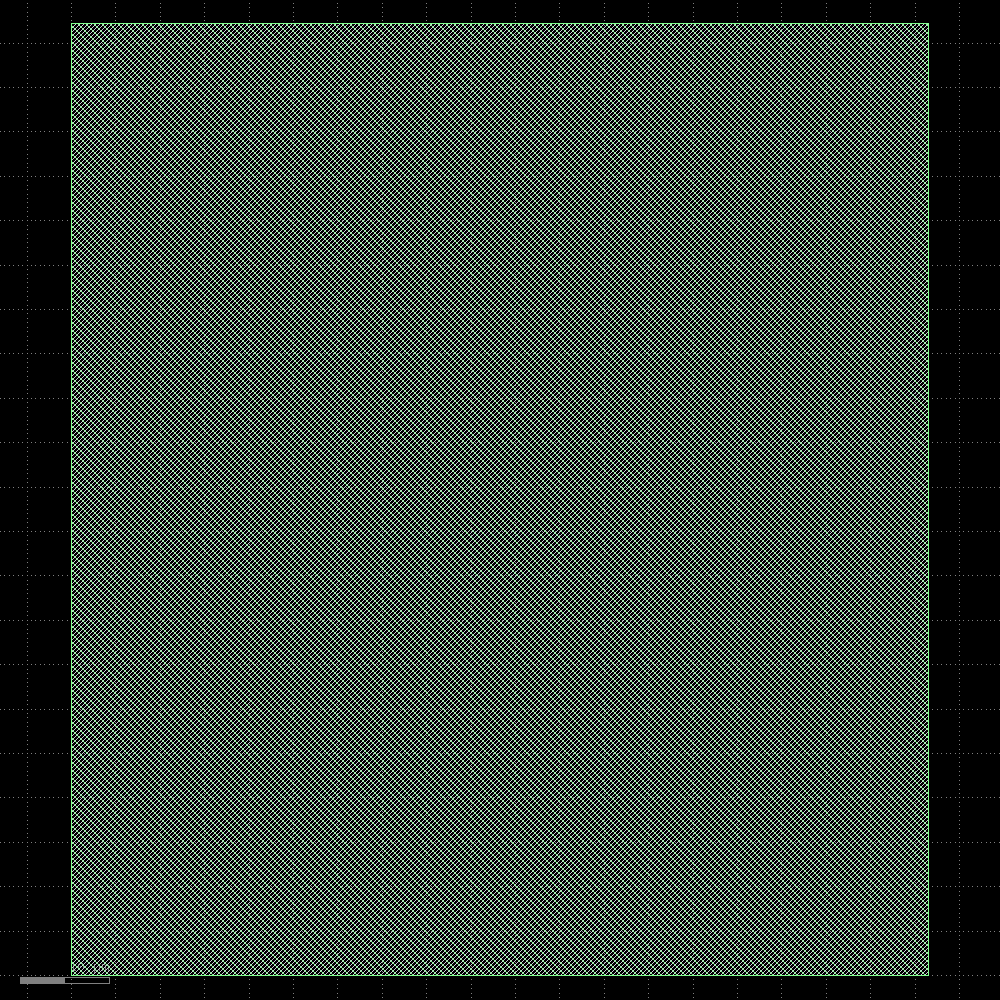

In [39]:
display(floorplan)

# Tap/Endcap Cell Insertion


In [40]:
TapEndcapInsertion = Step.factory.get("OpenROAD.TapEndcapInsertion")

tdi = TapEndcapInsertion(state_in=floorplan.state_out)
tdi.start()

─────────────────────────────────────────────── Tap/Decap Insertion ───────────────────────────────────────────────

[07:17:30] VERBOSE  Running 'OpenROAD.TapEndcapInsertion' at                                           ]8;id=199787;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=834142;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\
                    'librelane_run/11-openroad-tapendcapinsertion'…                                                

[07:17:30] VERBOSE  Logging subprocess to                                                              ]8;id=504559;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=420728;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\
                    'librelane_run/11-openroad-tapendcapinsertion/openroad-tapendcapinsertion.log'…                

Reading OpenROAD database at '/content/librelane_run/10-openroad-floorplan/spm.odb'…

Reading library file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/librelane_ipynb/librelane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO TAP-0004] Inserted 62 endcaps.

[INFO TAP-0005] Inserted 99 tapcells.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Fill cell                                62     232.72

Tap cell                                 99     123.87

Inverter                                 64     240.23

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   447    4011.35

Writing OpenROAD database to '/content/librelane_run/11-openroad-tapendcapinsertion/spm.odb'…

Writing netlist to '/content/librelane_run/11-openroad-tapendcapinsertion/spm.nl.v'…

Writing powered netlist to '/content/librelane_run/11-openroad-tapendcapinsertion/spm.pnl.v'…

Writing layout to '/content/librelane_run/11-openroad-tapendcapinsertion/spm.def'…

Writing timing constraints to '/content/librelane_run/11-openroad-tapendcapinsertion/spm.sdc'…

Format,Path
nl,librelane_run/11-openroad-tapendcapinsertion/spm.nl.v
pnl,librelane_run/11-openroad-tapendcapinsertion/spm.pnl.v
def,librelane_run/11-openroad-tapendcapinsertion/spm.def
odb,librelane_run/11-openroad-tapendcapinsertion/spm.odb
sdc,librelane_run/11-openroad-tapendcapinsertion/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[07:17:33] VERBOSE  Running 'KLayout.Render' at '../tmp/librelane_klayout_tmp_d7ilkpwy'…               ]8;id=545343;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=119811;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:17:33] VERBOSE  Logging subprocess to '../tmp/librelane_klayout_tmp_d7ilkpwy/klayout-render.log'…  ]8;id=484890;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=491723;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

#### Time Elapsed: 3.16s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
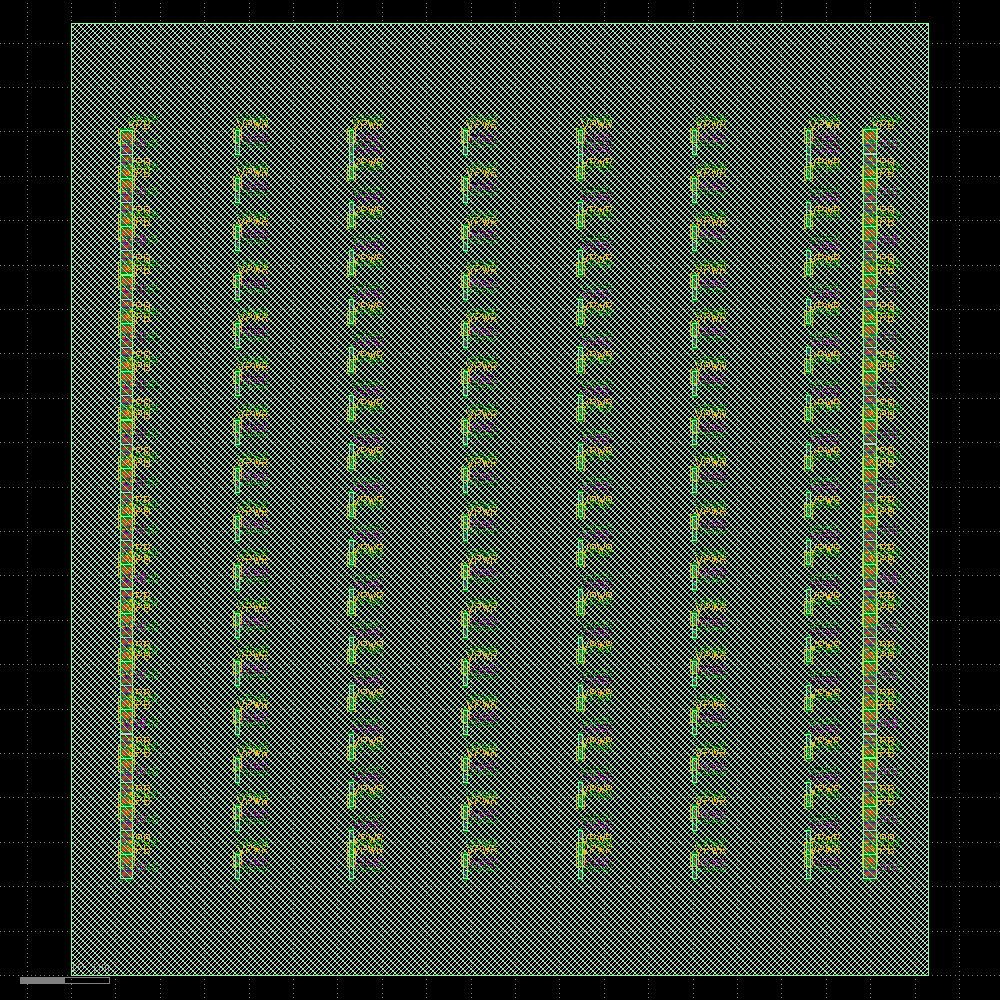

In [41]:
display(tdi)

# I/O Placement


In [42]:
IOPlacement = Step.factory.get("OpenROAD.IOPlacement")

ioplace = IOPlacement(state_in=tdi.state_out)
ioplace.start()

────────────────────────────────────────────────── I/O Placement ──────────────────────────────────────────────────

[07:17:35] VERBOSE  Running 'OpenROAD.IOPlacement' at 'librelane_run/12-openroad-ioplacement'…         ]8;id=310408;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=790691;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:17:35] VERBOSE  Logging subprocess to                                                              ]8;id=133016;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=478868;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\
                    'librelane_run/12-openroad-ioplacement/openroad-ioplacement.log'…                              

Reading OpenROAD database at '/content/librelane_run/11-openroad-tapendcapinsertion/spm.odb'…

Reading library file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/librelane_ipynb/librelane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] place_pins args: -min_distance 3

Found 0 macro blocks.

[INFO PPL-0010] Tentative 0 to set up sections.

[INFO PPL-0001] Number of slots           124

[INFO PPL-0002] Number of I/O             36

[INFO PPL-0003] Number of I/O w/sink      36

[INFO PPL-0004] Number of I/O w/o sink    0

[INFO PPL-0005] Slots per section         200

[INFO PPL-0006] Slots increase factor     0.01

[INFO PPL-0008] Successfully assigned pins to sections.

[INFO PPL-0012] I/O nets HPWL: 2621.62 um.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Fill cell                                62     232.72

Tap cell                                 99     123.87

Inverter                                 64     240.23

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   447    4011.35

Writing OpenROAD database to '/content/librelane_run/12-openroad-ioplacement/spm.odb'…

Writing netlist to '/content/librelane_run/12-openroad-ioplacement/spm.nl.v'…

Writing powered netlist to '/content/librelane_run/12-openroad-ioplacement/spm.pnl.v'…

Writing layout to '/content/librelane_run/12-openroad-ioplacement/spm.def'…

Writing timing constraints to '/content/librelane_run/12-openroad-ioplacement/spm.sdc'…

Format,Path
nl,librelane_run/12-openroad-ioplacement/spm.nl.v
pnl,librelane_run/12-openroad-ioplacement/spm.pnl.v
def,librelane_run/12-openroad-ioplacement/spm.def
odb,librelane_run/12-openroad-ioplacement/spm.odb
sdc,librelane_run/12-openroad-ioplacement/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[07:19:46] VERBOSE  Running 'KLayout.Render' at '../tmp/librelane_klayout_tmp_2gswv5c3'…               ]8;id=785847;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=501360;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:19:46] VERBOSE  Logging subprocess to '../tmp/librelane_klayout_tmp_2gswv5c3/klayout-render.log'…  ]8;id=237241;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=474655;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

#### Time Elapsed: 2.09s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
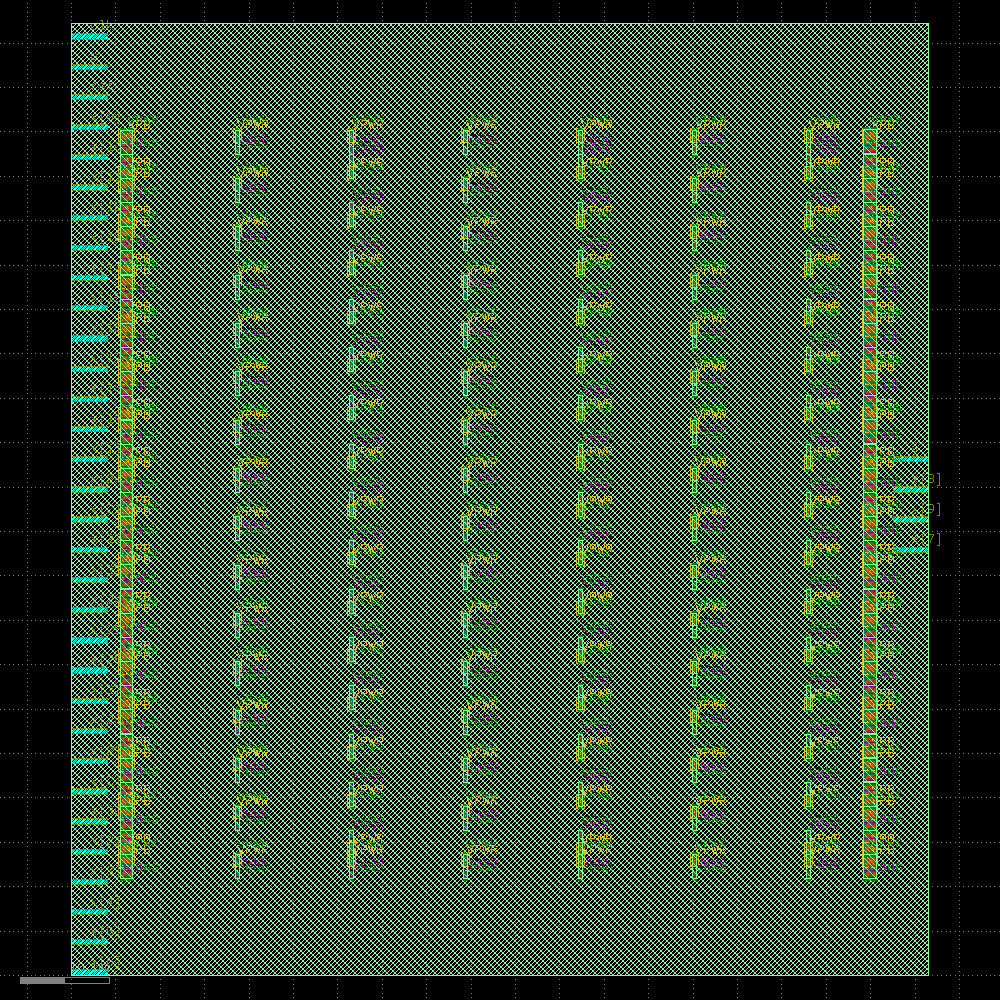

In [44]:
display(ioplace)

# Generating the Power Distribution Network (PDN)


In [45]:
GeneratePDN = Step.factory.get("OpenROAD.GeneratePDN")

pdn = GeneratePDN(
    state_in=ioplace.state_out,
    FP_PDN_VWIDTH=2,
    FP_PDN_HWIDTH=2,
    FP_PDN_VPITCH=30,
    FP_PDN_HPITCH=30,
)
pdn.start()

────────────────────────────────────── Power Distribution Network Generation ──────────────────────────────────────

[07:21:36] VERBOSE  Running 'OpenROAD.GeneratePDN' at 'librelane_run/13-openroad-generatepdn'…         ]8;id=784621;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=435431;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:21:36] INFO     'FP_PDN_CFG' not explicitly set, setting it to                                 ]8;id=966142;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=705318;file:///content/librelane_ipynb/librelane/steps/openroad.py#1179\1179]8;;\
                    /content/librelane_ipynb/librelane/scripts/openroad/common/pdn_cfg.tcl…                        

[07:21:36] VERBOSE  Logging subprocess to                                                              ]8;id=899621;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=984439;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\
                    'librelane_run/13-openroad-generatepdn/openroad-generatepdn.log'…                              

Reading OpenROAD database at '/content/librelane_run/12-openroad-ioplacement/spm.odb'…

Reading library file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/librelane_ipynb/librelane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting global connections...

[INFO PDN-0001] Inserting grid: stdcell_grid

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Fill cell                                62     232.72

Tap cell                                 99     123.87

Inverter                                 64     240.23

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   447    4011.35

Writing OpenROAD database to '/content/librelane_run/13-openroad-generatepdn/spm.odb'…

Writing netlist to '/content/librelane_run/13-openroad-generatepdn/spm.nl.v'…

Writing powered netlist to '/content/librelane_run/13-openroad-generatepdn/spm.pnl.v'…

Writing layout to '/content/librelane_run/13-openroad-generatepdn/spm.def'…

Writing timing constraints to '/content/librelane_run/13-openroad-generatepdn/spm.sdc'…

[INFO PSM-0040] All shapes on net VPWR are connected.

[INFO PSM-0040] All shapes on net VGND are connected.

Format,Path
nl,librelane_run/13-openroad-generatepdn/spm.nl.v
pnl,librelane_run/13-openroad-generatepdn/spm.pnl.v
def,librelane_run/13-openroad-generatepdn/spm.def
odb,librelane_run/13-openroad-generatepdn/spm.odb
sdc,librelane_run/13-openroad-generatepdn/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[07:24:14] VERBOSE  Running 'KLayout.Render' at '../tmp/librelane_klayout_tmp_eu88bq4f'…               ]8;id=93702;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=338053;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:24:14] VERBOSE  Logging subprocess to '../tmp/librelane_klayout_tmp_eu88bq4f/klayout-render.log'…  ]8;id=13505;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=564685;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

#### Time Elapsed: 1.12s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
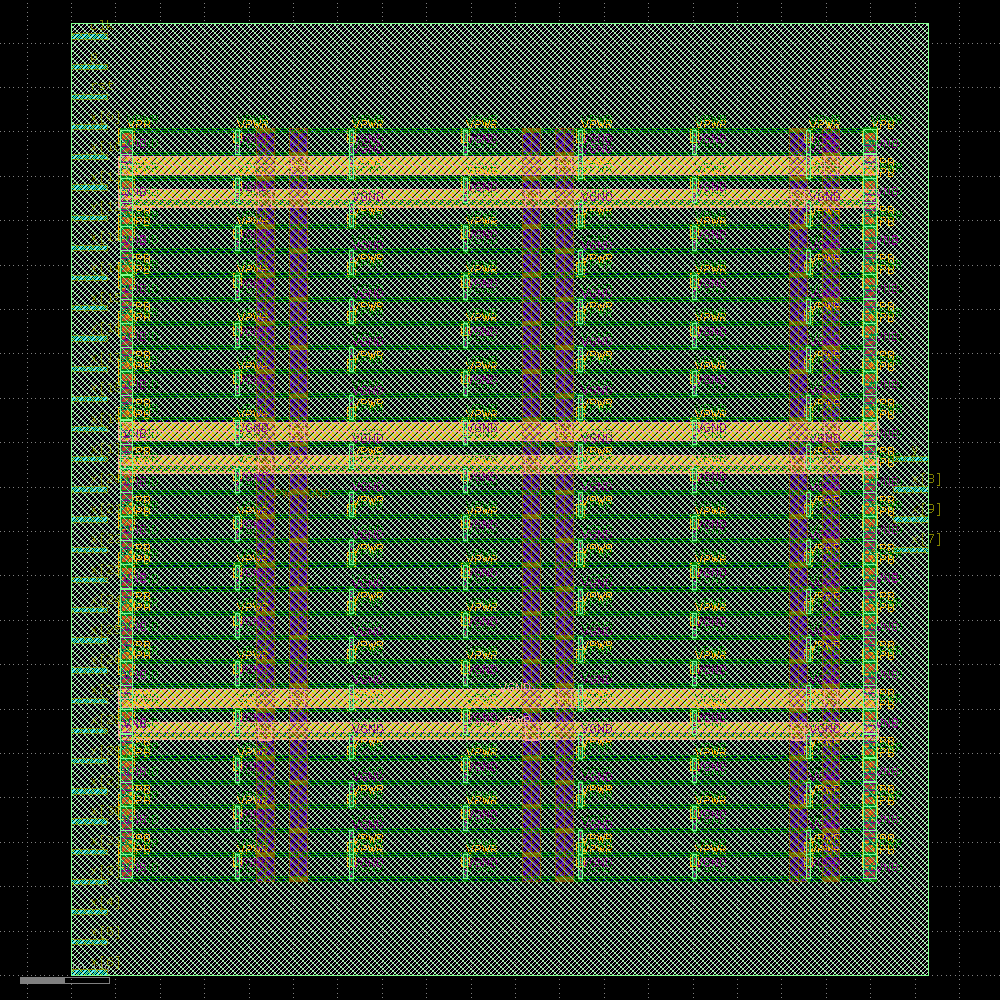

In [46]:
display(pdn)

# Global Placement


In [47]:
GlobalPlacement = Step.factory.get("OpenROAD.GlobalPlacement")

gpl = GlobalPlacement(state_in=pdn.state_out)
gpl.start()

──────────────────────────────────────────────── Global Placement ─────────────────────────────────────────────────

[07:29:25] VERBOSE  Running 'OpenROAD.GlobalPlacement' at 'librelane_run/14-openroad-globalplacement'… ]8;id=585999;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=222644;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:29:25] INFO     'PL_TARGET_DENSITY_PCT' not explicitly set, using dynamically calculated       ]8;id=359754;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=879654;file:///content/librelane_ipynb/librelane/steps/openroad.py#1265\1265]8;;\
                    target density: 62.659100…                                                                     

[07:29:25] VERBOSE  Logging subprocess to                                                              ]8;id=355507;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=795568;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\
                    'librelane_run/14-openroad-globalplacement/openroad-globalplacement.log'…                      

Reading OpenROAD database at '/content/librelane_run/13-openroad-generatepdn/spm.odb'…

Reading library file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/librelane_ipynb/librelane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting RC values…

[INFO] Setting signal min routing layer to: met1 and clock min routing layer to met1.

[INFO] Setting signal max routing layer to: met5 and clock max routing layer to met5.

+ global_placement -density 0.626591 -timing_driven -routability_driven -pad_right 0 -pad_left 0                   
-init_wirelength_coef 0.25

[INFO GPL-0002] DBU: 1000

[INFO GPL-0003] SiteSize: (  0.460  2.720 ) um

[INFO GPL-0004] CoreBBox: (  5.520 10.880 ) ( 90.620 95.200 ) um

[INFO GPL-0006] NumInstances:               447

[INFO GPL-0007] NumPlaceInstances:          286

[INFO GPL-0008] NumFixedInstances:          161

[INFO GPL-0009] NumDummyInstances:            0

[INFO GPL-0010] NumNets:                    321

[INFO GPL-0011] NumPins:                    958

[INFO GPL-0012] DieBBox:  (  0.000  0.000 ) ( 96.535 107.255 ) um

[INFO GPL-0013] CoreBBox: (  5.520 10.880 ) ( 90.620 95.200 ) um

[INFO GPL-0016] CoreArea:              7175.632 um^2

[INFO GPL-0017] NonPlaceInstsArea:      356.592 um^2

[INFO GPL-0018] PlaceInstsArea:        3654.755 um^2

[INFO GPL-0019] Util:                    53.596 %

[INFO GPL-0020] StdInstsArea:          3654.755 um^2

[INFO GPL-0021] MacroInstsArea:           0.000 um^2

[InitialPlace]  Iter: 1 CG residual: 0.00000007 HPWL: 5542300

[InitialPlace]  Iter: 2 CG residual: 0.00000010 HPWL: 4828538

[InitialPlace]  Iter: 3 CG residual: 0.00000011 HPWL: 4596976

[InitialPlace]  Iter: 4 CG residual: 0.00000008 HPWL: 4534055

[InitialPlace]  Iter: 5 CG residual: 0.00000010 HPWL: 4512895

[INFO GPL-0031] FillerInit:NumGCells:       335

[INFO GPL-0032] FillerInit:NumGNets:        321

[INFO GPL-0033] FillerInit:NumGPins:        958

[INFO GPL-0023] TargetDensity:            0.627

[INFO GPL-0024] AvrgPlaceInstArea:       12.779 um^2

[INFO GPL-0025] IdealBinArea:            20.394 um^2

[INFO GPL-0026] IdealBinCnt:                351

[INFO GPL-0027] TotalBinArea:          7175.632 um^2

[INFO GPL-0028] BinCnt:        16     16

[INFO GPL-0029] BinSize: (  5.319  5.270 )

[INFO GPL-0030] NumBins: 256

[NesterovSolve] Iter:    1 overflow: 0.823 HPWL: 2073380

[NesterovSolve] Iter:   10 overflow: 0.788 HPWL: 2147962

[INFO GPL-0100] Timing-driven: executing resizer for reweighting nets.

[INFO GPL-0101] Timing-driven: worst slack 6.66e-09

[INFO GPL-0103] Timing-driven: weighted 31 nets.

[NesterovSolve] Iter:   20 overflow: 0.765 HPWL: 2190447

[NesterovSolve] Iter:   30 overflow: 0.766 HPWL: 2187327

[NesterovSolve] Iter:   40 overflow: 0.772 HPWL: 2175197

[NesterovSolve] Iter:   50 overflow: 0.769 HPWL: 2179122

[NesterovSolve] Iter:   60 overflow: 0.768 HPWL: 2182546

[NesterovSolve] Iter:   70 overflow: 0.769 HPWL: 2179384

[NesterovSolve] Iter:   80 overflow: 0.769 HPWL: 2178387

[NesterovSolve] Iter:   90 overflow: 0.767 HPWL: 2178819

[NesterovSolve] Iter:  100 overflow: 0.767 HPWL: 2176974

[NesterovSolve] Iter:  110 overflow: 0.765 HPWL: 2174361

[NesterovSolve] Iter:  120 overflow: 0.762 HPWL: 2172850

[NesterovSolve] Iter:  130 overflow: 0.757 HPWL: 2170730

[NesterovSolve] Iter:  140 overflow: 0.751 HPWL: 2169763

[NesterovSolve] Iter:  150 overflow: 0.741 HPWL: 2163928

[NesterovSolve] Iter:  160 overflow: 0.723 HPWL: 2155844

[NesterovSolve] Iter:  170 overflow: 0.712 HPWL: 2182158

[NesterovSolve] Iter:  180 overflow: 0.698 HPWL: 2219238

[NesterovSolve] Iter:  190 overflow: 0.659 HPWL: 2291781

[INFO GPL-0100] Timing-driven: executing resizer for reweighting nets.

[INFO GPL-0101] Timing-driven: worst slack 6.63e-09

[INFO GPL-0103] Timing-driven: weighted 31 nets.

[NesterovSolve] Iter:  200 overflow: 0.624 HPWL: 2375650

[NesterovSolve] Snapshot saved at iter = 203

[NesterovSolve] Iter:  210 overflow: 0.575 HPWL: 2438989

[NesterovSolve] Iter:  220 overflow: 0.527 HPWL: 2506346

[INFO GPL-0100] Timing-driven: executing resizer for reweighting nets.

[INFO GPL-0101] Timing-driven: worst slack 6.61e-09

[INFO GPL-0103] Timing-driven: weighted 31 nets.

[NesterovSolve] Iter:  230 overflow: 0.455 HPWL: 2585676

[NesterovSolve] Iter:  240 overflow: 0.400 HPWL: 2628342

[NesterovSolve] Iter:  250 overflow: 0.356 HPWL: 2693655

[NesterovSolve] Iter:  260 overflow: 0.339 HPWL: 2709366

[NesterovSolve] Iter:  270 overflow: 0.317 HPWL: 2716785

[INFO GPL-0075] Routability numCall: 1 inflationIterCnt: 1 bloatIterCnt: 0

[INFO GPL-0036] TileBBox: (    0    0 ) ( 6900 6900 ) DBU

[INFO GPL-0038] TileCnt:      13   15

[INFO GPL-0040] NumTiles: 195

[INFO GPL-0081] TotalRouteOverflow: 0

[INFO GPL-0082] OverflowTileCnt: 0

[INFO GPL-0083] 0.5%RC: 0.7695683836936951

[INFO GPL-0084] 1.0%RC: 0.7347541451454163

[INFO GPL-0085] 2.0%RC: 0.7092161774635315

[INFO GPL-0086] 5.0%RC: 0.6819598972797394

[INFO GPL-0087] FinalRC: 0.75216126

[INFO GPL-0077] FinalRC lower than targetRC(1.01), routability not needed.

[NesterovSolve] Iter:  280 overflow: 0.294 HPWL: 2753339

[INFO GPL-0100] Timing-driven: executing resizer for reweighting nets.

[INFO GPL-0101] Timing-driven: worst slack 6.57e-09

[INFO GPL-0103] Timing-driven: weighted 31 nets.

[NesterovSolve] Iter:  290 overflow: 0.280 HPWL: 2771995

[NesterovSolve] Iter:  300 overflow: 0.266 HPWL: 2786319

[NesterovSolve] Iter:  310 overflow: 0.251 HPWL: 2806170

[NesterovSolve] Iter:  320 overflow: 0.234 HPWL: 2830183

[NesterovSolve] Iter:  330 overflow: 0.214 HPWL: 2877693

[INFO GPL-0100] Timing-driven: executing resizer for reweighting nets.

[INFO GPL-0101] Timing-driven: worst slack 6.55e-09

[INFO GPL-0103] Timing-driven: weighted 30 nets.

[NesterovSolve] Iter:  340 overflow: 0.189 HPWL: 2913512

[NesterovSolve] Iter:  350 overflow: 0.155 HPWL: 2928423

[INFO GPL-0100] Timing-driven: executing resizer for reweighting nets.

[INFO GPL-0101] Timing-driven: worst slack 6.54e-09

[INFO GPL-0103] Timing-driven: weighted 31 nets.

[NesterovSolve] Iter:  360 overflow: 0.132 HPWL: 2950113

[NesterovSolve] Iter:  370 overflow: 0.116 HPWL: 2981089

[NesterovSolve] Finished with Overflow: 0.098540

[INFO] Setting RC values…

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Fill cell                                62     232.72

Tap cell                                 99     123.87

Inverter                                 64     240.23

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   447    4011.35

Writing OpenROAD database to '/content/librelane_run/14-openroad-globalplacement/spm.odb'…

Writing netlist to '/content/librelane_run/14-openroad-globalplacement/spm.nl.v'…

Writing powered netlist to '/content/librelane_run/14-openroad-globalplacement/spm.pnl.v'…

Writing layout to '/content/librelane_run/14-openroad-globalplacement/spm.def'…

Writing timing constraints to '/content/librelane_run/14-openroad-globalplacement/spm.sdc'…

Format,Path
nl,librelane_run/14-openroad-globalplacement/spm.nl.v
pnl,librelane_run/14-openroad-globalplacement/spm.pnl.v
def,librelane_run/14-openroad-globalplacement/spm.def
odb,librelane_run/14-openroad-globalplacement/spm.odb
sdc,librelane_run/14-openroad-globalplacement/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[07:29:46] VERBOSE  Running 'KLayout.Render' at '../tmp/librelane_klayout_tmp_o5mhajxt'…               ]8;id=732648;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=174685;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:29:46] VERBOSE  Logging subprocess to '../tmp/librelane_klayout_tmp_o5mhajxt/klayout-render.log'…  ]8;id=550267;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=438052;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

#### Time Elapsed: 4.08s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
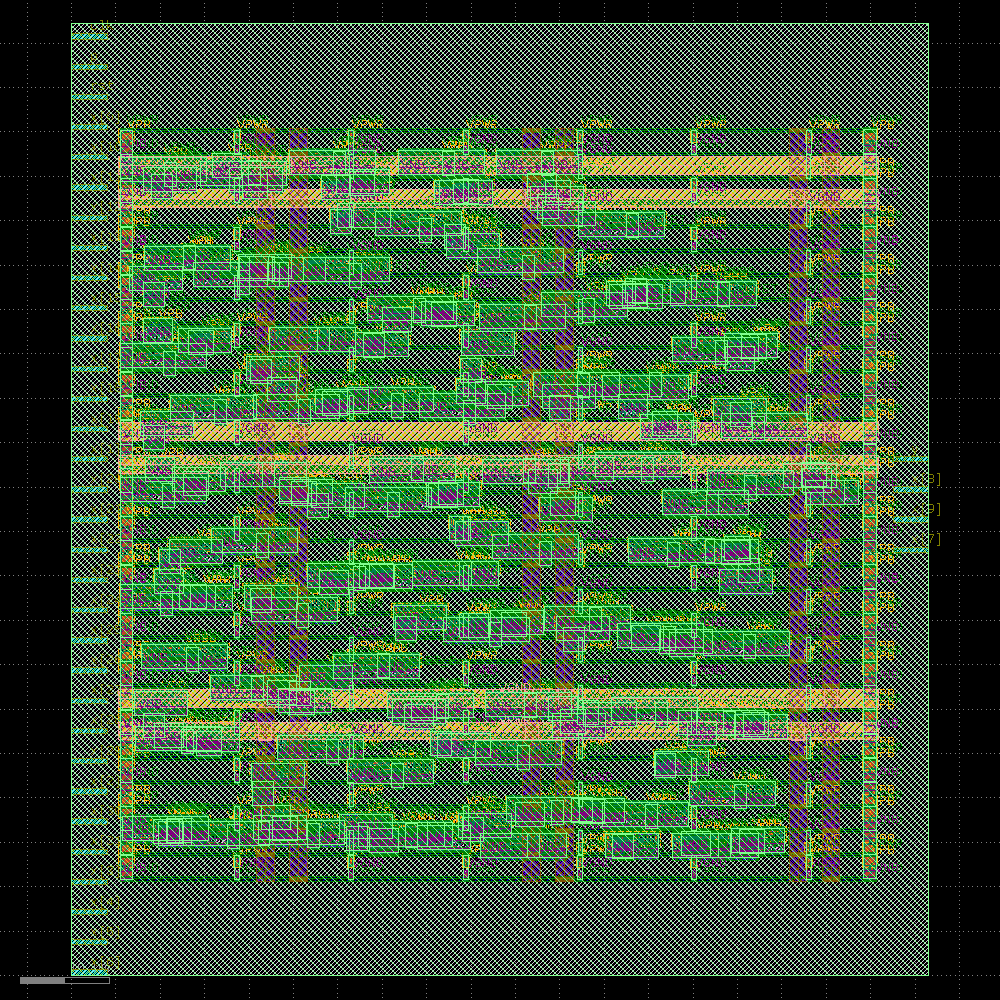

In [48]:
display(gpl)

# Detailed Placement


In [49]:
DetailedPlacement = Step.factory.get("OpenROAD.DetailedPlacement")

dpl = DetailedPlacement(state_in=gpl.state_out)
dpl.start()

─────────────────────────────────────────────── Detailed Placement ────────────────────────────────────────────────

[07:30:43] VERBOSE  Running 'OpenROAD.DetailedPlacement' at                                            ]8;id=348580;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=115141;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\
                    'librelane_run/15-openroad-detailedplacement'…                                                 

[07:30:43] VERBOSE  Logging subprocess to                                                              ]8;id=896560;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=915647;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\
                    'librelane_run/15-openroad-detailedplacement/openroad-detailedplacement.log'…                  

Reading OpenROAD database at '/content/librelane_run/14-openroad-globalplacement/spm.odb'…

Reading library file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/librelane_ipynb/librelane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

Placement Analysis

---------------------------------

total displacement        762.3 u

average displacement        1.7 u

max displacement            9.9 u

original HPWL            3045.4 u

legalized HPWL           4014.9 u

delta HPWL                   32 %

[INFO DPL-0020] Mirrored 99 instances

[INFO DPL-0021] HPWL before            4014.9 u

[INFO DPL-0022] HPWL after             3798.2 u

[INFO DPL-0023] HPWL delta               -5.4 %

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Fill cell                                62     232.72

Tap cell                                 99     123.87

Inverter                                 64     240.23

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   447    4011.35

Writing OpenROAD database to '/content/librelane_run/15-openroad-detailedplacement/spm.odb'…

Writing netlist to '/content/librelane_run/15-openroad-detailedplacement/spm.nl.v'…

Writing powered netlist to '/content/librelane_run/15-openroad-detailedplacement/spm.pnl.v'…

Writing layout to '/content/librelane_run/15-openroad-detailedplacement/spm.def'…

Writing timing constraints to '/content/librelane_run/15-openroad-detailedplacement/spm.sdc'…

Format,Path
nl,librelane_run/15-openroad-detailedplacement/spm.nl.v
pnl,librelane_run/15-openroad-detailedplacement/spm.pnl.v
def,librelane_run/15-openroad-detailedplacement/spm.def
odb,librelane_run/15-openroad-detailedplacement/spm.odb
sdc,librelane_run/15-openroad-detailedplacement/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[07:32:52] VERBOSE  Running 'KLayout.Render' at '../tmp/librelane_klayout_tmp_9j8ia945'…               ]8;id=694215;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=124636;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:32:52] VERBOSE  Logging subprocess to '../tmp/librelane_klayout_tmp_9j8ia945/klayout-render.log'…  ]8;id=64735;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=211849;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

#### Time Elapsed: 1.12s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
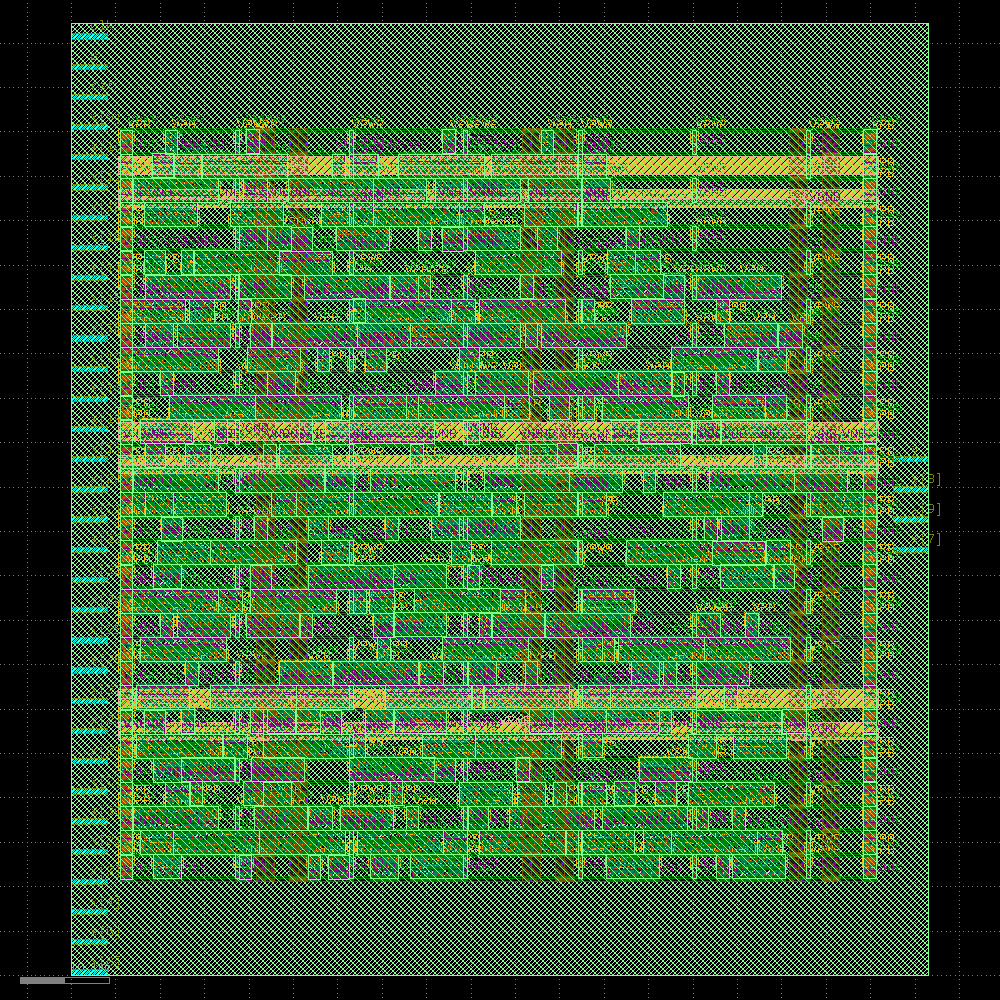

In [50]:
display(dpl)

# Clock Tree Synthesis (CTS)


In [51]:
CTS = Step.factory.get("OpenROAD.CTS")

cts = CTS(state_in=dpl.state_out)
cts.start()

────────────────────────────────────────────── Clock Tree Synthesis ───────────────────────────────────────────────

[07:35:17] VERBOSE  Running 'OpenROAD.CTS' at 'librelane_run/16-openroad-cts'…                         ]8;id=798627;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=286611;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:35:17] VERBOSE  Logging subprocess to 'librelane_run/16-openroad-cts/openroad-cts.log'…            ]8;id=148879;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=838127;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

Reading timing models for corner nom_tt_025C_1v80…

Reading timing library for the 'nom_tt_025C_1v80' corner at                                                        
'/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading timing models for corner nom_ff_n40C_1v95…

Reading timing library for the 'nom_ff_n40C_1v95' corner at                                                        
'/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ff_n40C_1v95.lib'…

Reading timing models for corner nom_ss_100C_1v60…

Reading timing library for the 'nom_ss_100C_1v60' corner at                                                        
'/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ss_100C_1v60.lib'…

Reading OpenROAD database at '/content/librelane_run/15-openroad-detailedplacement/spm.odb'…

Reading design constraints file at '/content/librelane_ipynb/librelane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting RC values…

[INFO] Configuring cts characterization…

[INFO] Performing clock tree synthesis…

[INFO] Looking for the following net(s): clk

[INFO] Running Clock Tree Synthesis…

[INFO CTS-0050] Root buffer is sky130_fd_sc_hd__clkbuf_16.

[INFO CTS-0051] Sink buffer is sky130_fd_sc_hd__clkbuf_8.

[INFO CTS-0052] The following clock buffers will be used for CTS:

sky130_fd_sc_hd__clkbuf_2

sky130_fd_sc_hd__clkbuf_4

sky130_fd_sc_hd__clkbuf_8

[INFO CTS-0049] Characterization buffer is sky130_fd_sc_hd__clkbuf_8.

[INFO CTS-0007] Net "clk" found for clock "clk".

[INFO CTS-0010]  Clock net "clk" has 64 sinks.

[INFO CTS-0008] TritonCTS found 1 clock nets.

[INFO CTS-0097] Characterization used 3 buffer(s) types.

[INFO CTS-0200] 0 placement blockages have been identified.

[INFO CTS-0201] 0 placed hard macros will be treated like blockages.

[INFO CTS-0027] Generating H-Tree topology for net clk.

[INFO CTS-0028]  Total number of sinks: 64.

[INFO CTS-0029]  Sinks will be clustered in groups of up to 25 and with maximum cluster diameter of 50.0 um.

[INFO CTS-0030]  Number of static layers: 0.

[INFO CTS-0020]  Wire segment unit: 13600  dbu (13 um).

[INFO CTS-0023]  Original sink region: [(7165, 15020), (73405, 91180)].

[INFO CTS-0024]  Normalized sink region: [(0.526838, 1.10441), (5.39743, 6.70441)].

[INFO CTS-0025]     Width:  4.8706.

[INFO CTS-0026]     Height: 5.6000.

Level 1

Direction: Vertical

Sinks per sub-region: 32

Sub-region size: 4.8706 X 2.8000

[INFO CTS-0034]     Segment length (rounded): 1.

Level 2

Direction: Horizontal

Sinks per sub-region: 16

Sub-region size: 2.4353 X 2.8000

[INFO CTS-0034]     Segment length (rounded): 1.

Level 3

Direction: Vertical

Sinks per sub-region: 8

Sub-region size: 2.4353 X 1.4000

[INFO CTS-0034]     Segment length (rounded): 1.

[INFO CTS-0032]  Stop criterion found. Max number of sinks is 15.

[INFO CTS-0035]  Number of sinks covered: 64.

[INFO CTS-0018]     Created 9 clock buffers.

[INFO CTS-0012]     Minimum number of buffers in the clock path: 2.

[INFO CTS-0013]     Maximum number of buffers in the clock path: 2.

[INFO CTS-0015]     Created 9 clock nets.

[INFO CTS-0016]     Fanout distribution for the current clock = 6:1, 7:3, 8:1, 9:1, 10:2..

[INFO CTS-0017]     Max level of the clock tree: 3.

[INFO CTS-0098] Clock net "clk"

[INFO CTS-0099]  Sinks 70

[INFO CTS-0100]  Leaf buffers 0

[INFO CTS-0101]  Average sink wire length 140.82 um

[INFO CTS-0102]  Path depth 2 - 2

[INFO CTS-0207]  Leaf load cells 6

[INFO] Repairing long wires on clock nets…

[INFO RSZ-0058] Using max wire length 6335um.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Fill cell                                62     232.72

Tap cell                                 99     123.87

Clock buffer                             11     246.49

Inverter                                 64     240.23

Clock inverter                            4      45.04

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   462    4302.88

Writing OpenROAD database to '/content/librelane_run/16-openroad-cts/spm.odb'…

Writing netlist to '/content/librelane_run/16-openroad-cts/spm.nl.v'…

Writing powered netlist to '/content/librelane_run/16-openroad-cts/spm.pnl.v'…

Writing layout to '/content/librelane_run/16-openroad-cts/spm.def'…

Writing timing constraints to '/content/librelane_run/16-openroad-cts/spm.sdc'…

[INFO] Legalizing…

Placement Analysis

---------------------------------

total displacement        146.9 u

average displacement        0.3 u

max displacement            8.3 u

original HPWL            4167.7 u

legalized HPWL           4563.8 u

delta HPWL                   10 %

[INFO DPL-0020] Mirrored 102 instances

[INFO DPL-0021] HPWL before            4563.8 u

[INFO DPL-0022] HPWL after             4320.2 u

[INFO DPL-0023] HPWL delta               -5.3 %

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Fill cell                                62     232.72

Tap cell                                 99     123.87

Clock buffer                             11     246.49

Inverter                                 64     240.23

Clock inverter                            4      45.04

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   462    4302.88

Writing OpenROAD database to '/content/librelane_run/16-openroad-cts/spm.odb'…

Writing netlist to '/content/librelane_run/16-openroad-cts/spm.nl.v'…

Writing powered netlist to '/content/librelane_run/16-openroad-cts/spm.pnl.v'…

Writing layout to '/content/librelane_run/16-openroad-cts/spm.def'…

Writing timing constraints to '/content/librelane_run/16-openroad-cts/spm.sdc'…

Format,Path
nl,librelane_run/16-openroad-cts/spm.nl.v
pnl,librelane_run/16-openroad-cts/spm.pnl.v
def,librelane_run/16-openroad-cts/spm.def
odb,librelane_run/16-openroad-cts/spm.odb
sdc,librelane_run/16-openroad-cts/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[07:37:54] VERBOSE  Running 'KLayout.Render' at '../tmp/librelane_klayout_tmp_lyg6zn_l'…               ]8;id=542502;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=740638;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:37:54] VERBOSE  Logging subprocess to '../tmp/librelane_klayout_tmp_lyg6zn_l/klayout-render.log'…  ]8;id=443424;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=163654;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

#### Time Elapsed: 14.84s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
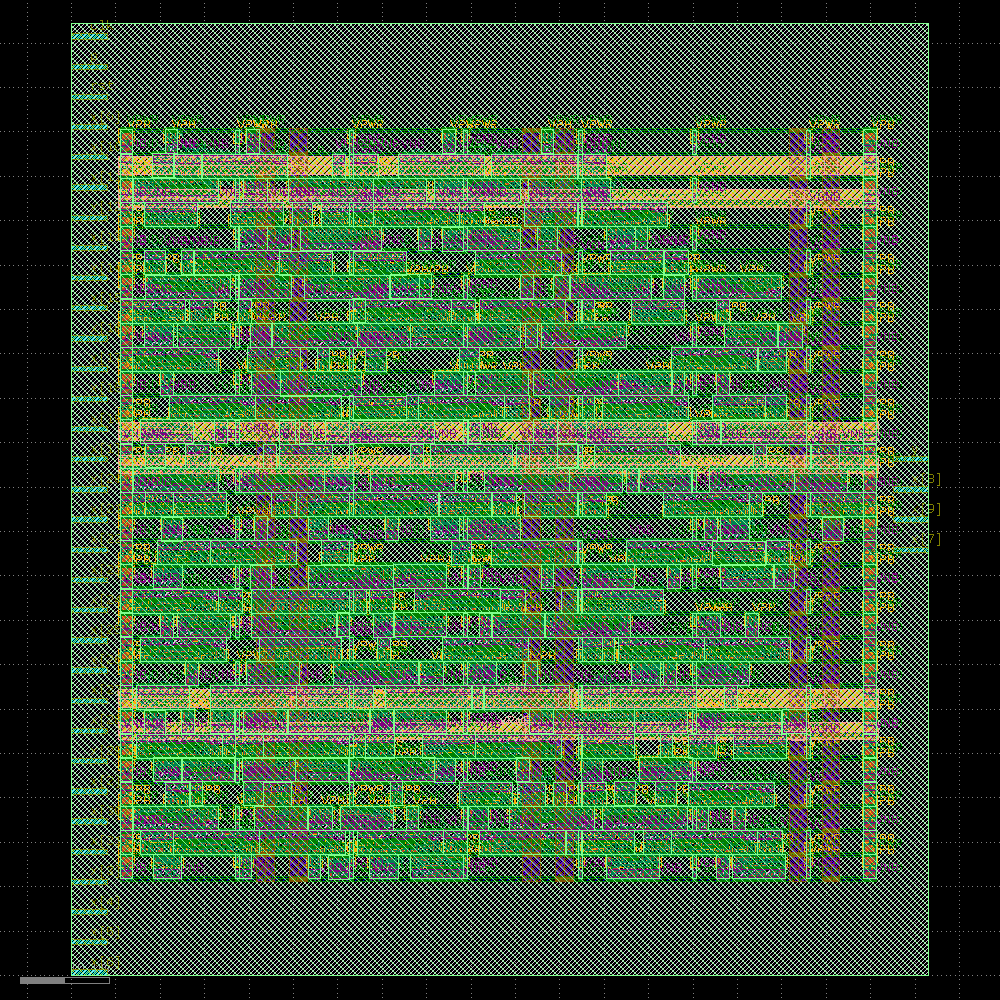

In [52]:
display(cts)

# Global Routing


In [53]:
GlobalRouting = Step.factory.get("OpenROAD.GlobalRouting")

grt = GlobalRouting(state_in=cts.state_out)
grt.start()

───────────────────────────────────────────────── Global Routing ──────────────────────────────────────────────────

[07:40:41] VERBOSE  Running 'OpenROAD.GlobalRouting' at 'librelane_run/17-openroad-globalrouting'…     ]8;id=936897;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=898149;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:40:41] VERBOSE  Logging subprocess to                                                              ]8;id=527689;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=621907;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\
                    'librelane_run/17-openroad-globalrouting/openroad-globalrouting.log'…                          

Reading OpenROAD database at '/content/librelane_run/16-openroad-cts/spm.odb'…

Reading library file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/librelane_ipynb/librelane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO] Setting signal min routing layer to: met1 and clock min routing layer to met1.

[INFO] Setting signal max routing layer to: met5 and clock max routing layer to met5.

-congestion_iterations 50 -verbose

[INFO GRT-0020] Min routing layer: met1

[INFO GRT-0021] Max routing layer: met5

[INFO GRT-0022] Global adjustment: 30%

[INFO GRT-0023] Grid origin: (0, 0)

[INFO GRT-0043] No OR_DEFAULT vias defined.

[INFO GRT-0088] Layer li1     Track-Pitch = 0.4600  line-2-Via Pitch: 0.3400

[INFO GRT-0088] Layer met1    Track-Pitch = 0.3400  line-2-Via Pitch: 0.3400

[INFO GRT-0088] Layer met2    Track-Pitch = 0.4600  line-2-Via Pitch: 0.3500

[INFO GRT-0088] Layer met3    Track-Pitch = 0.6800  line-2-Via Pitch: 0.6150

[INFO GRT-0088] Layer met4    Track-Pitch = 0.9200  line-2-Via Pitch: 1.0400

[INFO GRT-0088] Layer met5    Track-Pitch = 3.4000  line-2-Via Pitch: 3.1100

[INFO GRT-0019] Found 10 clock nets.

[INFO GRT-0001] Minimum degree: 2

[INFO GRT-0002] Maximum degree: 65

[INFO GRT-0003] Macros: 0

[INFO GRT-0043] No OR_DEFAULT vias defined.

[INFO GRT-0004] Blockages: 1206

[INFO GRT-0053] Routing resources analysis:

Routing      Original      Derated      Resource

Layer     Direction    Resources     Resources    Reduction (%)

---------------------------------------------------------------

li1        Vertical            0             0          0.00%

met1       Horizontal       4003          1889          52.81%

met2       Vertical         3165          1951          38.36%

met3       Horizontal       1995          1263          36.69%

met4       Vertical         1302           642          50.69%

met5       Horizontal        399           168          57.89%

---------------------------------------------------------------

[INFO GRT-0197] Via related to pin nodes: 1518

[INFO GRT-0198] Via related Steiner nodes: 10

[INFO GRT-0199] Via filling finished.

[INFO GRT-0111] Final number of vias: 1860

[INFO GRT-0112] Final usage 3D: 6344

[INFO GRT-0096] Final congestion report:

Layer         Resource        Demand        Usage (%)    Max H / Max V / Total Overflow

---------------------------------------------------------------------------------------

li1                  0             0            0.00%             0 /  0 /  0

met1              1889           298           15.78%             0 /  0 /  0

met2              1951           331           16.97%             0 /  0 /  0

met3              1263           135           10.69%             0 /  0 /  0

met4               642             0            0.00%             0 /  0 /  0

met5               168             0            0.00%             0 /  0 /  0

---------------------------------------------------------------------------------------

Total             5913           764           12.92%             0 /  0 /  0

[INFO GRT-0018] Total wirelength: 9280 um

[INFO GRT-0014] Routed nets: 330

[INFO] Setting RC values…

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Fill cell                                62     232.72

Tap cell                                 99     123.87

Clock buffer                             11     246.49

Inverter                                 64     240.23

Clock inverter                            4      45.04

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   462    4302.88

Writing OpenROAD database to '/content/librelane_run/17-openroad-globalrouting/spm.odb'…

Writing layout to '/content/librelane_run/17-openroad-globalrouting/spm.def'…

Format,Path
nl,librelane_run/16-openroad-cts/spm.nl.v
pnl,librelane_run/16-openroad-cts/spm.pnl.v
def,librelane_run/17-openroad-globalrouting/spm.def
odb,librelane_run/17-openroad-globalrouting/spm.odb
sdc,librelane_run/16-openroad-cts/spm.sdc


# Detailed Routing


In [54]:
DetailedRouting = Step.factory.get("OpenROAD.DetailedRouting")

drt = DetailedRouting(state_in=grt.state_out)
drt.start()

──────────────────────────────────────────────── Detailed Routing ─────────────────────────────────────────────────

[07:43:21] VERBOSE  Running 'OpenROAD.DetailedRouting' at 'librelane_run/18-openroad-detailedrouting'… ]8;id=784079;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=688930;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:43:21] INFO     Running TritonRoute with 2 threads…                                            ]8;id=972406;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=705264;file:///content/librelane_ipynb/librelane/steps/openroad.py#1624\1624]8;;\

[07:43:21] VERBOSE  Logging subprocess to                                                              ]8;id=954942;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=245325;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\
                    'librelane_run/18-openroad-detailedrouting/openroad-detailedrouting.log'…                      

Reading OpenROAD database at '/content/librelane_run/17-openroad-globalrouting/spm.odb'…

Reading library file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading design constraints file at '/content/librelane_ipynb/librelane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

[INFO ORD-0030] Using 2 thread(s).

[INFO DRT-0149] Reading tech and libs.

[07:43:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=545348;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=440126;file:///content/librelane_ipynb/librelane/steps/openroad.py#239\239]8;;\
                    layer mcon                                                                                     

[07:43:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=841502;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=378350;file:///content/librelane_ipynb/librelane/steps/openroad.py#239\239]8;;\
                    layer mcon                                                                                     

[07:43:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=232565;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=535137;file:///content/librelane_ipynb/librelane/steps/openroad.py#239\239]8;;\
                    layer via                                                                                      

[07:43:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=212245;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=27542;file:///content/librelane_ipynb/librelane/steps/openroad.py#239\239]8;;\
                    layer via                                                                                      

[07:43:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=614583;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=548965;file:///content/librelane_ipynb/librelane/steps/openroad.py#239\239]8;;\
                    layer via2                                                                                     

[07:43:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=649215;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=500466;file:///content/librelane_ipynb/librelane/steps/openroad.py#239\239]8;;\
                    layer via2                                                                                     

[07:43:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=452278;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=251407;file:///content/librelane_ipynb/librelane/steps/openroad.py#239\239]8;;\
                    layer via3                                                                                     

[07:43:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=707810;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=397210;file:///content/librelane_ipynb/librelane/steps/openroad.py#239\239]8;;\
                    layer via3                                                                                     

[07:43:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=845354;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=68092;file:///content/librelane_ipynb/librelane/steps/openroad.py#239\239]8;;\
                    layer via4                                                                                     

[07:43:21] WARNING  [DRT-0349] LEF58_ENCLOSURE with no CUTCLASS is not supported. Skipping for      ]8;id=410827;file:///content/librelane_ipynb/librelane/steps/openroad.py\openroad.py]8;;\:]8;id=62029;file:///content/librelane_ipynb/librelane/steps/openroad.py#239\239]8;;\
                    layer via4                                                                                     

Units:                1000

Number of layers:     13

Number of macros:     441

Number of vias:       29

Number of viarulegen: 25

[INFO DRT-0150] Reading design.

Design:                   spm

Die area:                 ( 0 0 ) ( 96535 107255 )

Number of track patterns: 12

Number of DEF vias:       0

Number of components:     462

Number of terminals:      38

Number of snets:          2

Number of nets:           330

[INFO DRT-0167] List of default vias:

Layer via

default via: M1M2_PR

Layer via2

default via: M2M3_PR

Layer via3

default via: M3M4_PR

Layer via4

default via: M4M5_PR

[INFO DRT-0162] Library cell analysis.

[INFO DRT-0163] Instance analysis.

[INFO DRT-0164] Number of unique instances = 45.

[INFO DRT-0168] Init region query.

[INFO DRT-0024]   Complete FR_MASTERSLICE.

[INFO DRT-0024]   Complete licon.

[INFO DRT-0024]   Complete li1.

[INFO DRT-0024]   Complete mcon.

[INFO DRT-0024]   Complete met1.

[INFO DRT-0024]   Complete via.

[INFO DRT-0024]   Complete met2.

[INFO DRT-0024]   Complete via2.

[INFO DRT-0024]   Complete met3.

[INFO DRT-0024]   Complete via3.

[INFO DRT-0024]   Complete met4.

[INFO DRT-0024]   Complete via4.

[INFO DRT-0024]   Complete met5.

[INFO DRT-0033] FR_MASTERSLICE shape region query size = 0.

[INFO DRT-0033] licon shape region query size = 0.

[INFO DRT-0033] li1 shape region query size = 12469.

[INFO DRT-0033] mcon shape region query size = 0.

[INFO DRT-0033] met1 shape region query size = 2289.

[INFO DRT-0033] via shape region query size = 576.

[INFO DRT-0033] met2 shape region query size = 192.

[INFO DRT-0033] via2 shape region query size = 480.

[INFO DRT-0033] met3 shape region query size = 324.

[INFO DRT-0033] via3 shape region query size = 480.

[INFO DRT-0033] met4 shape region query size = 126.

[INFO DRT-0033] via4 shape region query size = 18.

[INFO DRT-0033] met5 shape region query size = 30.

[INFO DRT-0165] Start pin access.

[INFO DRT-0078]   Complete 113 pins.

[INFO DRT-0081]   Complete 39 unique inst patterns.

[INFO DRT-0084]   Complete 213 groups.

#scanned instances     = 462

#unique  instances     = 45

#stdCellGenAp          = 1125

#stdCellValidPlanarAp  = 44

#stdCellValidViaAp     = 753

#stdCellPinNoAp        = 0

#stdCellPinCnt         = 946

#instTermValidViaApCnt = 0

#macroGenAp            = 0

#macroValidPlanarAp    = 0

#macroValidViaAp       = 0

#macroNoAp             = 0

[INFO DRT-0166] Complete pin access.

[INFO DRT-0267] cpu time = 00:00:11, elapsed time = 00:00:08, memory = 138.33 (MB), peak = 242.96 (MB)

[INFO DRT-0157] Number of guides:     1999

[INFO DRT-0169] Post process guides.

[INFO DRT-0176] GCELLGRID X 0 DO 13 STEP 6900 ;

[INFO DRT-0177] GCELLGRID Y 0 DO 15 STEP 6900 ;

[INFO DRT-0028]   Complete FR_MASTERSLICE.

[INFO DRT-0028]   Complete licon.

[INFO DRT-0028]   Complete li1.

[INFO DRT-0028]   Complete mcon.

[INFO DRT-0028]   Complete met1.

[INFO DRT-0028]   Complete via.

[INFO DRT-0028]   Complete met2.

[INFO DRT-0028]   Complete via2.

[INFO DRT-0028]   Complete met3.

[INFO DRT-0028]   Complete via3.

[INFO DRT-0028]   Complete met4.

[INFO DRT-0028]   Complete via4.

[INFO DRT-0028]   Complete met5.

[INFO DRT-0178] Init guide query.

[INFO DRT-0035]   Complete FR_MASTERSLICE (guide).

[INFO DRT-0035]   Complete licon (guide).

[INFO DRT-0035]   Complete li1 (guide).

[INFO DRT-0035]   Complete mcon (guide).

[INFO DRT-0035]   Complete met1 (guide).

[INFO DRT-0035]   Complete via (guide).

[INFO DRT-0035]   Complete met2 (guide).

[INFO DRT-0035]   Complete via2 (guide).

[INFO DRT-0035]   Complete met3 (guide).

[INFO DRT-0035]   Complete via3 (guide).

[INFO DRT-0035]   Complete met4 (guide).

[INFO DRT-0035]   Complete via4 (guide).

[INFO DRT-0035]   Complete met5 (guide).

[INFO DRT-0036] FR_MASTERSLICE guide region query size = 0.

[INFO DRT-0036] licon guide region query size = 0.

[INFO DRT-0036] li1 guide region query size = 680.

[INFO DRT-0036] mcon guide region query size = 0.

[INFO DRT-0036] met1 guide region query size = 564.

[INFO DRT-0036] via guide region query size = 0.

[INFO DRT-0036] met2 guide region query size = 273.

[INFO DRT-0036] via2 guide region query size = 0.

[INFO DRT-0036] met3 guide region query size = 36.

[INFO DRT-0036] via3 guide region query size = 0.

[INFO DRT-0036] met4 guide region query size = 0.

[INFO DRT-0036] via4 guide region query size = 0.

[INFO DRT-0036] met5 guide region query size = 0.

[INFO DRT-0179] Init gr pin query.

[INFO DRT-0245] skipped writing guide updates to database.

[INFO DRT-0185] Post process initialize RPin region query.

[INFO DRT-0181] Start track assignment.

[INFO DRT-0184] Done with 953 vertical wires in 1 frboxes and 600 horizontal wires in 1 frboxes.

[INFO DRT-0186] Done with 66 vertical wires in 1 frboxes and 143 horizontal wires in 1 frboxes.

[INFO DRT-0182] Complete track assignment.

[INFO DRT-0267] cpu time = 00:00:00, elapsed time = 00:00:00, memory = 143.12 (MB), peak = 242.96 (MB)

[INFO DRT-0187] Start routing data preparation.

[INFO DRT-0267] cpu time = 00:00:00, elapsed time = 00:00:00, memory = 143.12 (MB), peak = 242.96 (MB)

[INFO DRT-0194] Start detail routing.

[INFO DRT-0195] Start 0th optimization iteration.

Completing 10% with 0 violations.

elapsed time = 00:00:00, memory = 151.39 (MB).

Completing 20% with 0 violations.

elapsed time = 00:00:00, memory = 150.53 (MB).

Completing 30% with 4 violations.

elapsed time = 00:00:01, memory = 153.29 (MB).

Completing 40% with 17 violations.

elapsed time = 00:00:01, memory = 153.29 (MB).

Completing 50% with 17 violations.

elapsed time = 00:00:02, memory = 164.28 (MB).

Completing 60% with 18 violations.

elapsed time = 00:00:03, memory = 164.28 (MB).

[INFO DRT-0199]   Number of violations = 54.

Viol/Layer         li1   met1   met2   met3

Metal Spacing       10      8      0      3

NS Metal             2      0      0      0

Recheck              0     25      3      0

Short                0      3      0      0

[INFO DRT-0267] cpu time = 00:00:05, elapsed time = 00:00:04, memory = 505.88 (MB), peak = 505.66 (MB)

Total wire length = 5260 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 2123 um.

Total wire length on LAYER met2 = 2160 um.

Total wire length on LAYER met3 = 977 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 1794.

Up-via summary (total 1794):

-----------------------

FR_MASTERSLICE       0

li1     852

met1     903

met2      39

met3       0

met4       0

-----------------------

1794

[INFO DRT-0195] Start 1st optimization iteration.

Completing 10% with 54 violations.

elapsed time = 00:00:00, memory = 505.88 (MB).

Completing 20% with 54 violations.

elapsed time = 00:00:00, memory = 505.88 (MB).

Completing 30% with 54 violations.

elapsed time = 00:00:00, memory = 509.20 (MB).

Completing 40% with 54 violations.

elapsed time = 00:00:00, memory = 509.20 (MB).

Completing 50% with 58 violations.

elapsed time = 00:00:00, memory = 509.20 (MB).

Completing 60% with 58 violations.

elapsed time = 00:00:01, memory = 509.20 (MB).

Completing 70% with 51 violations.

elapsed time = 00:00:01, memory = 512.24 (MB).

Completing 80% with 51 violations.

elapsed time = 00:00:01, memory = 512.24 (MB).

Completing 90% with 40 violations.

elapsed time = 00:00:02, memory = 512.24 (MB).

Completing 100% with 15 violations.

elapsed time = 00:00:02, memory = 512.24 (MB).

[INFO DRT-0199]   Number of violations = 15.

Viol/Layer        met1   met2   met3

Metal Spacing        4      0      3

Short                7      1      0

[INFO DRT-0267] cpu time = 00:00:04, elapsed time = 00:00:03, memory = 512.36 (MB), peak = 512.04 (MB)

Total wire length = 5267 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 2148 um.

Total wire length on LAYER met2 = 2143 um.

Total wire length on LAYER met3 = 975 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 1780.

Up-via summary (total 1780):

-----------------------

FR_MASTERSLICE       0

li1     851

met1     890

met2      39

met3       0

met4       0

-----------------------

1780

[INFO DRT-0195] Start 2nd optimization iteration.

Completing 10% with 15 violations.

elapsed time = 00:00:00, memory = 512.36 (MB).

Completing 20% with 15 violations.

elapsed time = 00:00:00, memory = 512.36 (MB).

Completing 30% with 15 violations.

elapsed time = 00:00:00, memory = 512.36 (MB).

Completing 40% with 15 violations.

elapsed time = 00:00:00, memory = 512.36 (MB).

Completing 50% with 15 violations.

elapsed time = 00:00:00, memory = 512.36 (MB).

Completing 60% with 15 violations.

elapsed time = 00:00:00, memory = 512.36 (MB).

Completing 70% with 15 violations.

elapsed time = 00:00:00, memory = 519.92 (MB).

Completing 80% with 15 violations.

elapsed time = 00:00:01, memory = 525.59 (MB).

Completing 90% with 3 violations.

elapsed time = 00:00:01, memory = 525.59 (MB).

Completing 100% with 3 violations.

elapsed time = 00:00:01, memory = 525.59 (MB).

[INFO DRT-0199]   Number of violations = 3.

Viol/Layer        met3

Metal Spacing        3

[INFO DRT-0267] cpu time = 00:00:01, elapsed time = 00:00:01, memory = 525.59 (MB), peak = 525.29 (MB)

Total wire length = 5253 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 2145 um.

Total wire length on LAYER met2 = 2131 um.

Total wire length on LAYER met3 = 975 um.

Total wire length on LAYER met4 = 0 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 1773.

Up-via summary (total 1773):

-----------------------

FR_MASTERSLICE       0

li1     851

met1     883

met2      39

met3       0

met4       0

-----------------------

1773

[INFO DRT-0195] Start 3rd optimization iteration.

Completing 10% with 3 violations.

elapsed time = 00:00:00, memory = 525.59 (MB).

Completing 20% with 3 violations.

elapsed time = 00:00:00, memory = 525.59 (MB).

Completing 30% with 0 violations.

elapsed time = 00:00:00, memory = 525.59 (MB).

Completing 40% with 0 violations.

elapsed time = 00:00:00, memory = 525.59 (MB).

Completing 50% with 0 violations.

elapsed time = 00:00:00, memory = 525.59 (MB).

Completing 60% with 0 violations.

elapsed time = 00:00:00, memory = 525.59 (MB).

[INFO DRT-0199]   Number of violations = 0.

[INFO DRT-0267] cpu time = 00:00:00, elapsed time = 00:00:00, memory = 525.59 (MB), peak = 525.29 (MB)

Total wire length = 5251 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 2145 um.

Total wire length on LAYER met2 = 2126 um.

Total wire length on LAYER met3 = 975 um.

Total wire length on LAYER met4 = 4 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 1775.

Up-via summary (total 1775):

-----------------------

FR_MASTERSLICE       0

li1     851

met1     883

met2      39

met3       2

met4       0

-----------------------

1775

[INFO DRT-0198] Complete detail routing.

Total wire length = 5251 um.

Total wire length on LAYER li1 = 0 um.

Total wire length on LAYER met1 = 2145 um.

Total wire length on LAYER met2 = 2126 um.

Total wire length on LAYER met3 = 975 um.

Total wire length on LAYER met4 = 4 um.

Total wire length on LAYER met5 = 0 um.

Total number of vias = 1775.

Up-via summary (total 1775):

-----------------------

FR_MASTERSLICE       0

li1     851

met1     883

met2      39

met3       2

met4       0

-----------------------

1775

[INFO DRT-0267] cpu time = 00:00:11, elapsed time = 00:00:10, memory = 525.59 (MB), peak = 525.29 (MB)

[INFO DRT-0180] Post processing.

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Fill cell                                62     232.72

Tap cell                                 99     123.87

Clock buffer                             11     246.49

Inverter                                 64     240.23

Clock inverter                            4      45.04

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   462    4302.88

Writing OpenROAD database to '/content/librelane_run/18-openroad-detailedrouting/spm.odb'…

Writing netlist to '/content/librelane_run/18-openroad-detailedrouting/spm.nl.v'…

Writing powered netlist to '/content/librelane_run/18-openroad-detailedrouting/spm.pnl.v'…

Writing layout to '/content/librelane_run/18-openroad-detailedrouting/spm.def'…

Writing timing constraints to '/content/librelane_run/18-openroad-detailedrouting/spm.sdc'…

Format,Path
nl,librelane_run/18-openroad-detailedrouting/spm.nl.v
pnl,librelane_run/18-openroad-detailedrouting/spm.pnl.v
def,librelane_run/18-openroad-detailedrouting/spm.def
odb,librelane_run/18-openroad-detailedrouting/spm.odb
sdc,librelane_run/18-openroad-detailedrouting/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[07:43:41] VERBOSE  Running 'KLayout.Render' at '../tmp/librelane_klayout_tmp_dzka5_oc'…               ]8;id=934327;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=206284;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[07:43:41] VERBOSE  Logging subprocess to '../tmp/librelane_klayout_tmp_dzka5_oc/klayout-render.log'…  ]8;id=664738;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=739578;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

#### Time Elapsed: 20.01s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
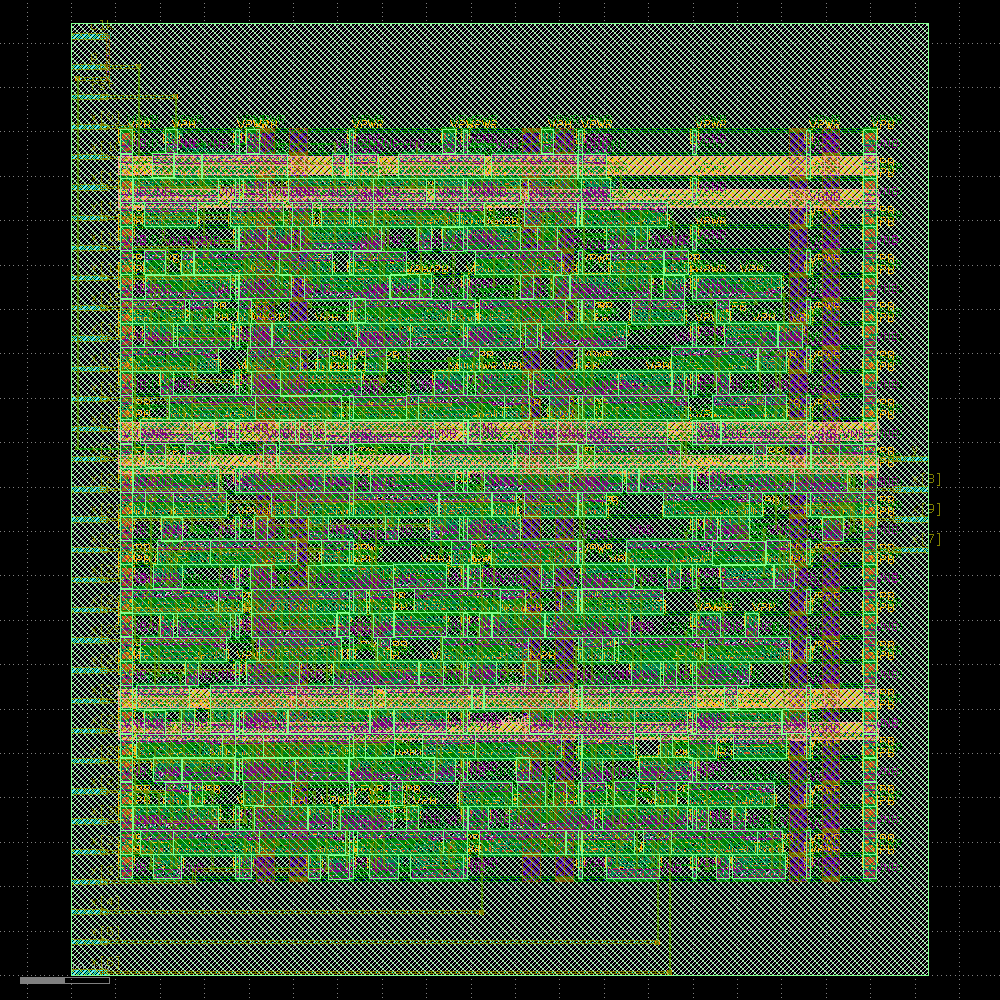

In [55]:
display(drt)